# Train on generated datasets

In [7]:
%load_ext autoreload
%autoreload 2

import numpy as np
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
from keras.utils.vis_utils import plot_model

from utils import *
from models import *
from classes import *
import config

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
STUDY_PATH = config.STUDY_PATH
GEN_DFS_PATH = config.GEN_DFS_PATH
REAL_FILE = config.REAL_FILE

TRAIN_VAL_RATIO_GEN = config.TRAIN_VAL_RATIO_GEN
N_STEPS = config.N_STEPS
N_FEATURES_IN = config.N_FEATURES_IN
N_FEATURES_OUT = config.N_FEATURES_OUT
TPL_PATH = config.TPL_PATH
n_input = N_STEPS * N_FEATURES_IN

pd.options.display.max_columns = 25

STUDY_PATH, GEN_DFS_PATH, REAL_FILE, TPL_PATH, TRAIN_VAL_RATIO_GEN

('C:/Users/Asus/Desktop/Skoltech/Multiphase flows/data/Subsea_Study[1-4-7]',
 'C:/Users/Asus/Desktop/Skoltech/Multiphase flows/data/Subsea_Study[1-4-7]/gens',
 'C:/Users/Asus/Desktop/Skoltech/Multiphase flows/data/real.csv',
 'C:\\Users\\Asus\\Desktop\\Skoltech\\Multiphase flows\\olga_proj\\Subsea_Study[1-4-7]',
 0.8)

## AdaBoost

In [9]:
m = Gen(model_name='AB-4', 
         study_path=STUDY_PATH, 
         real_file=REAL_FILE, 
         train_all_ratio=TRAIN_VAL_RATIO_GEN,
         gen_dfs_path=GEN_DFS_PATH,
         tpl_path=TPL_PATH,
         loss='mae',
         n_neurons=100)

m.train()
err, t = m.predict(plot_losses=True, plot_preds=True, plot_errs=False, print_res=False)
m.print_info()
m.save()

KeyboardInterrupt: 

## LGB

Train error:      33.916
Test error:       35.853
Training time:    3.560 s

train/all: 0.8
n_steps: 5
n_features_in: 6, n_features_out: 3
loss metric: mae
layers: 3, neurons: 100, droupout: 0.2
C:/Users/Asus/Desktop/Skoltech/Multiphase flows/data/Subsea_Study[1-4-7]/LGB-4.hdf saved


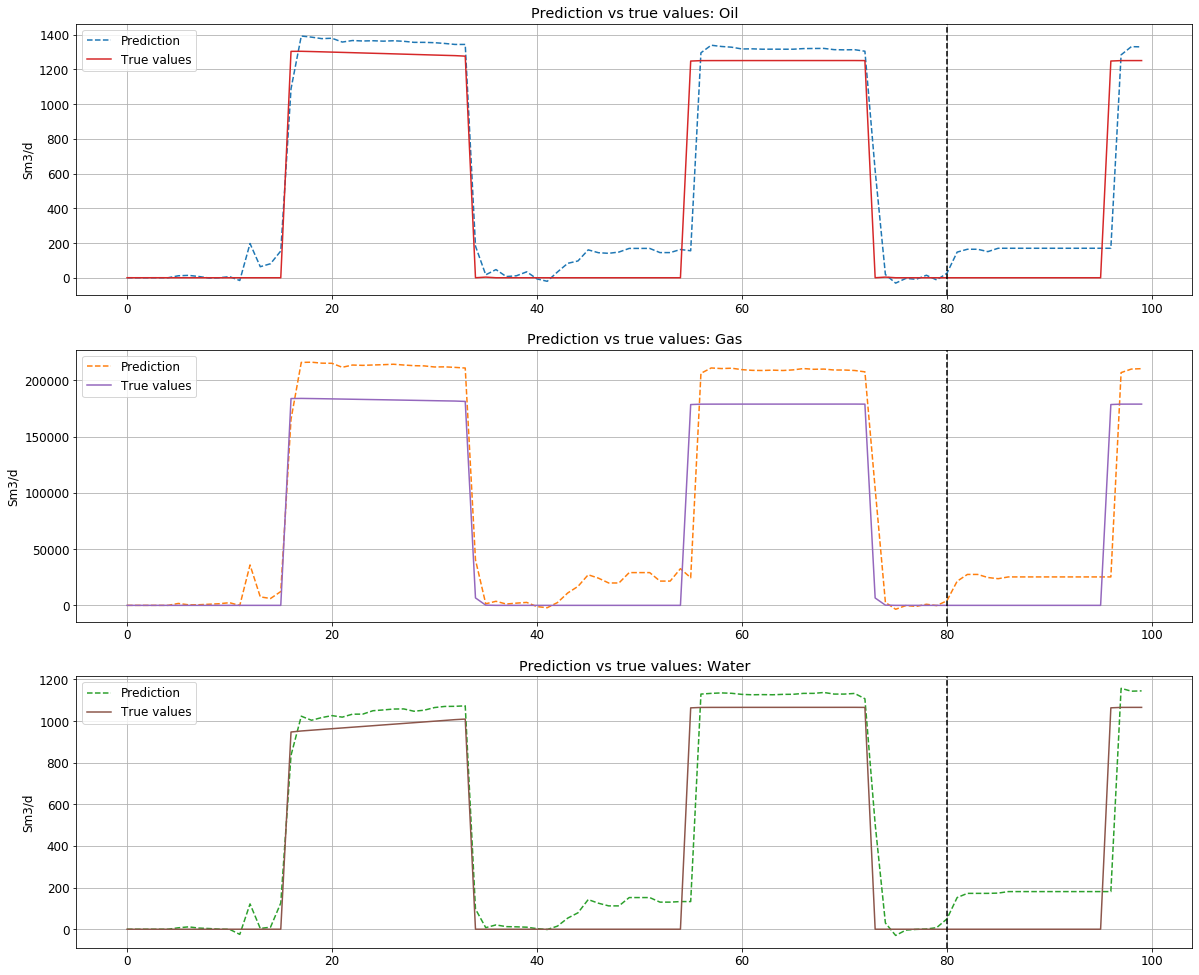

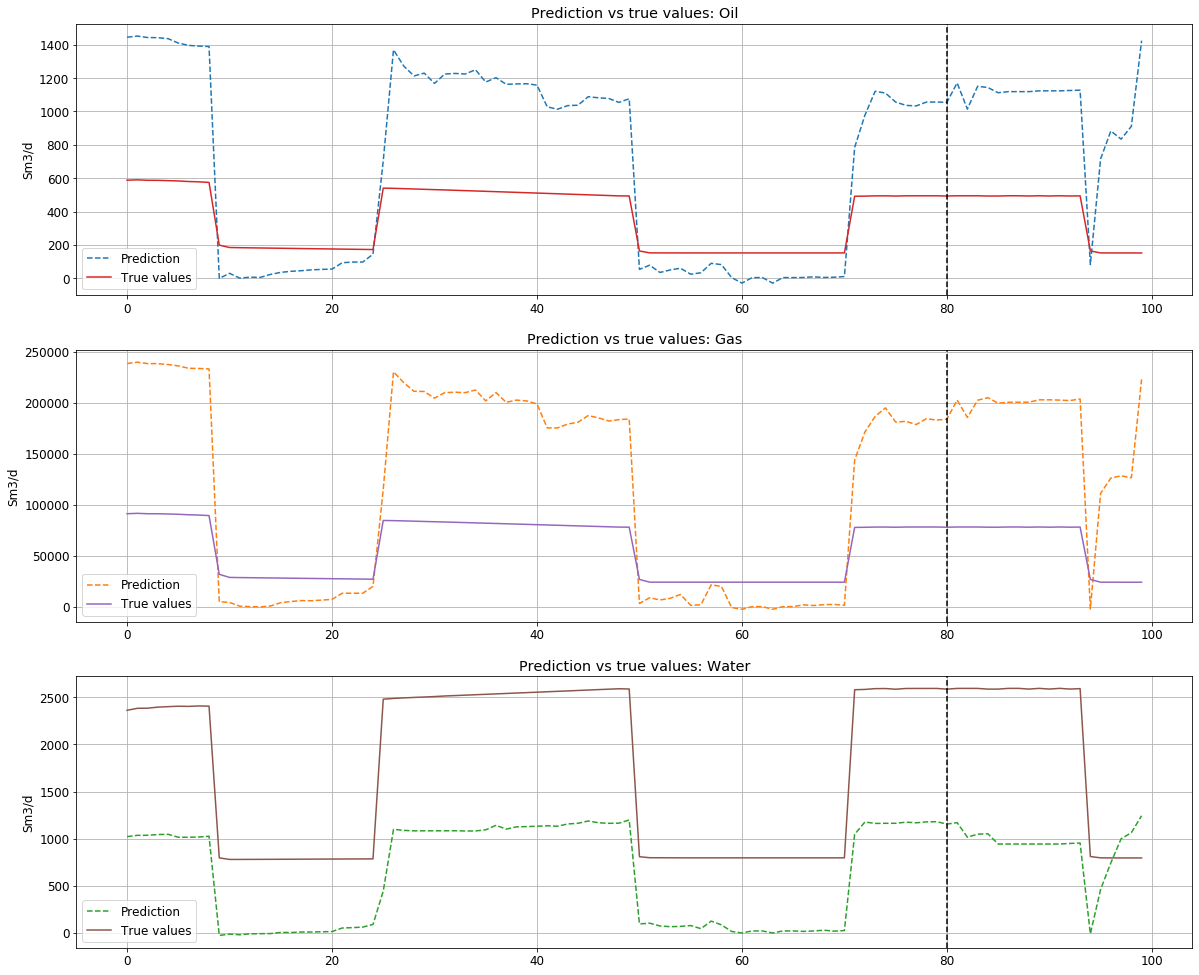

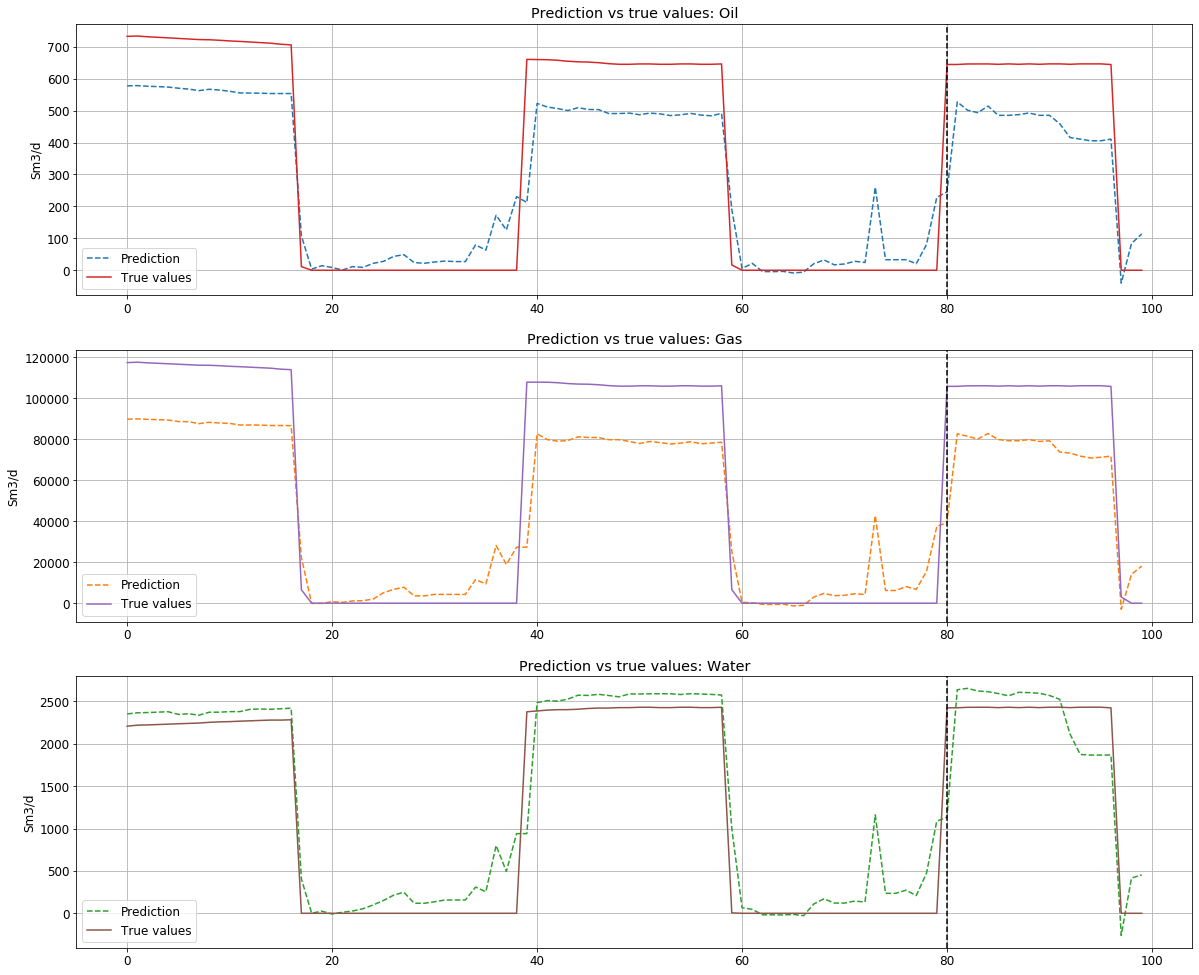

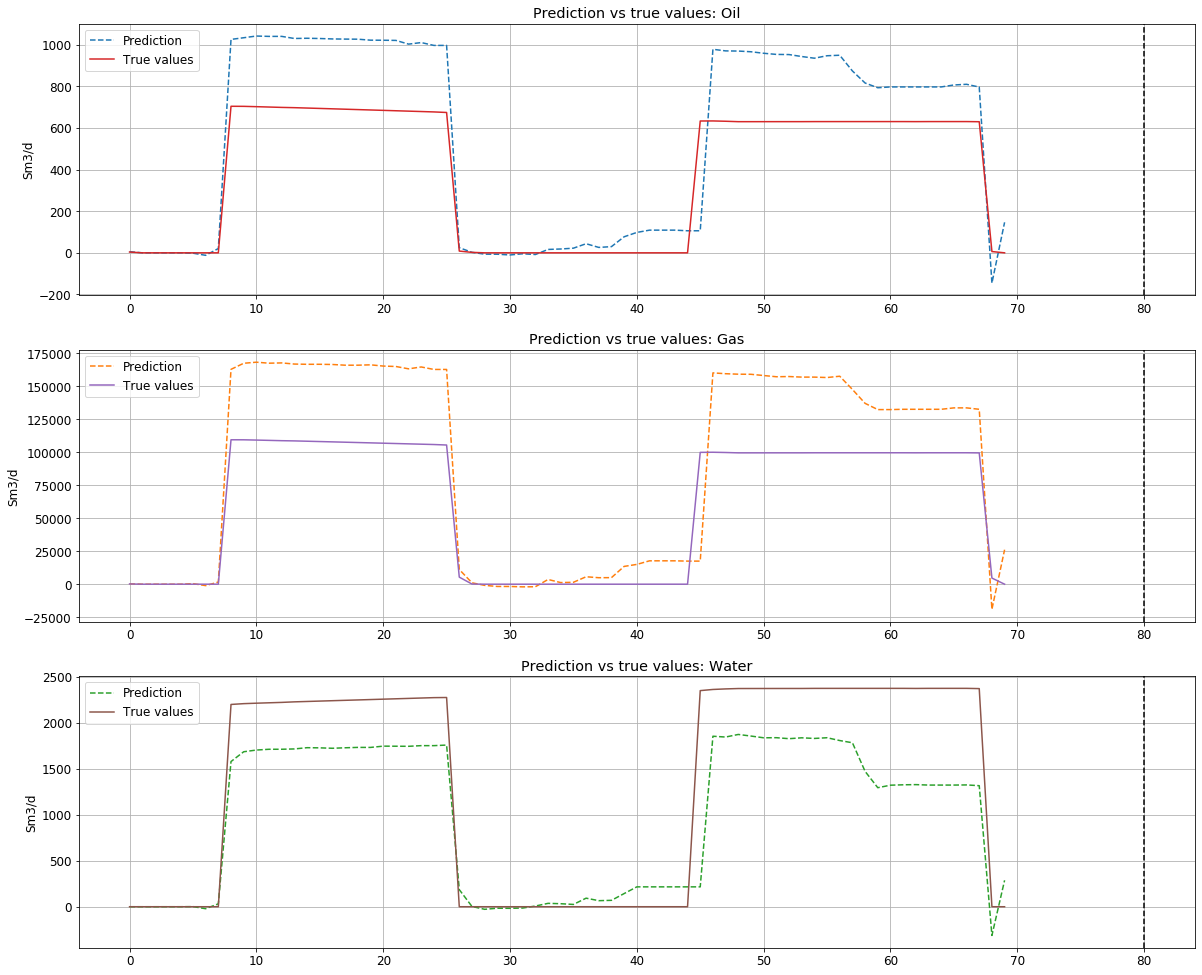

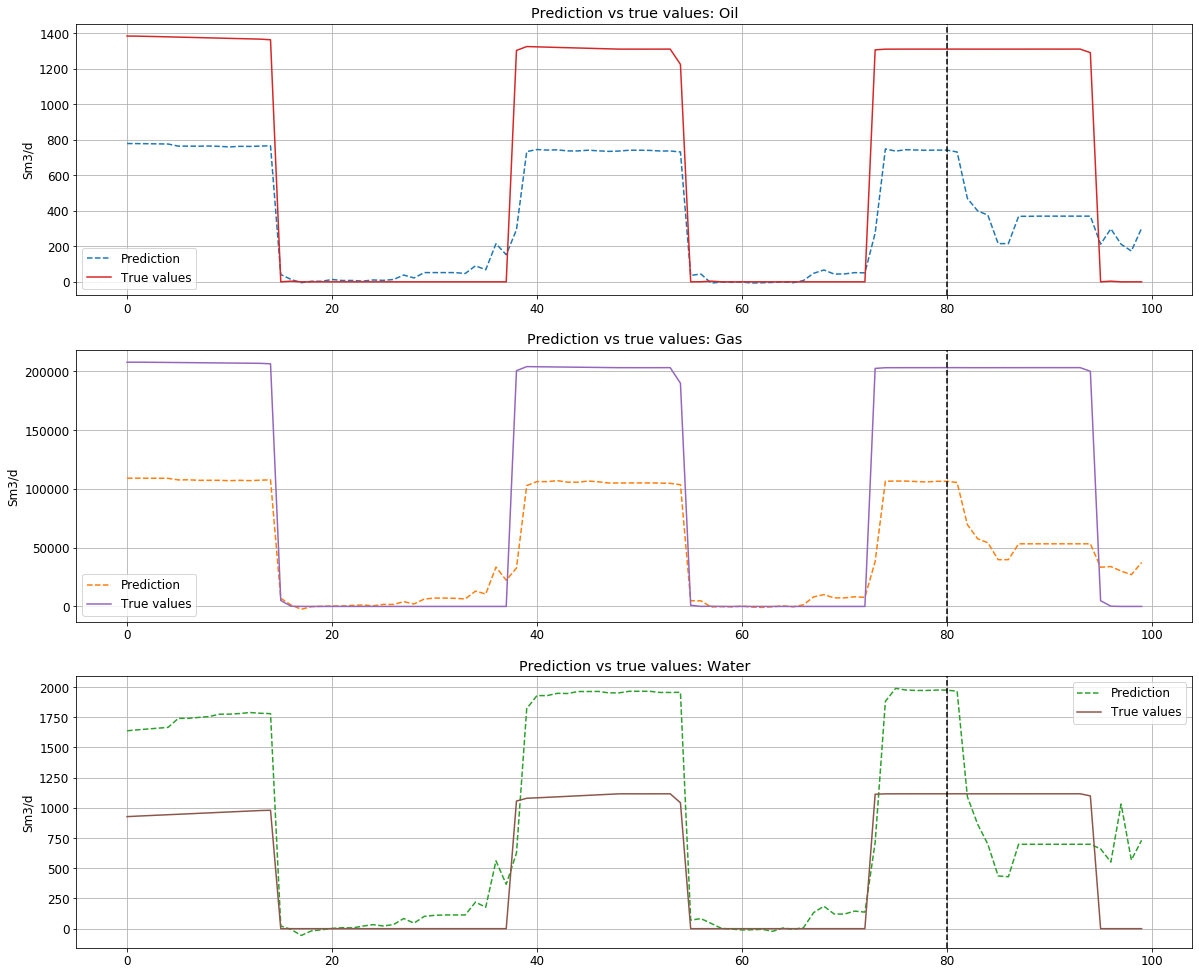

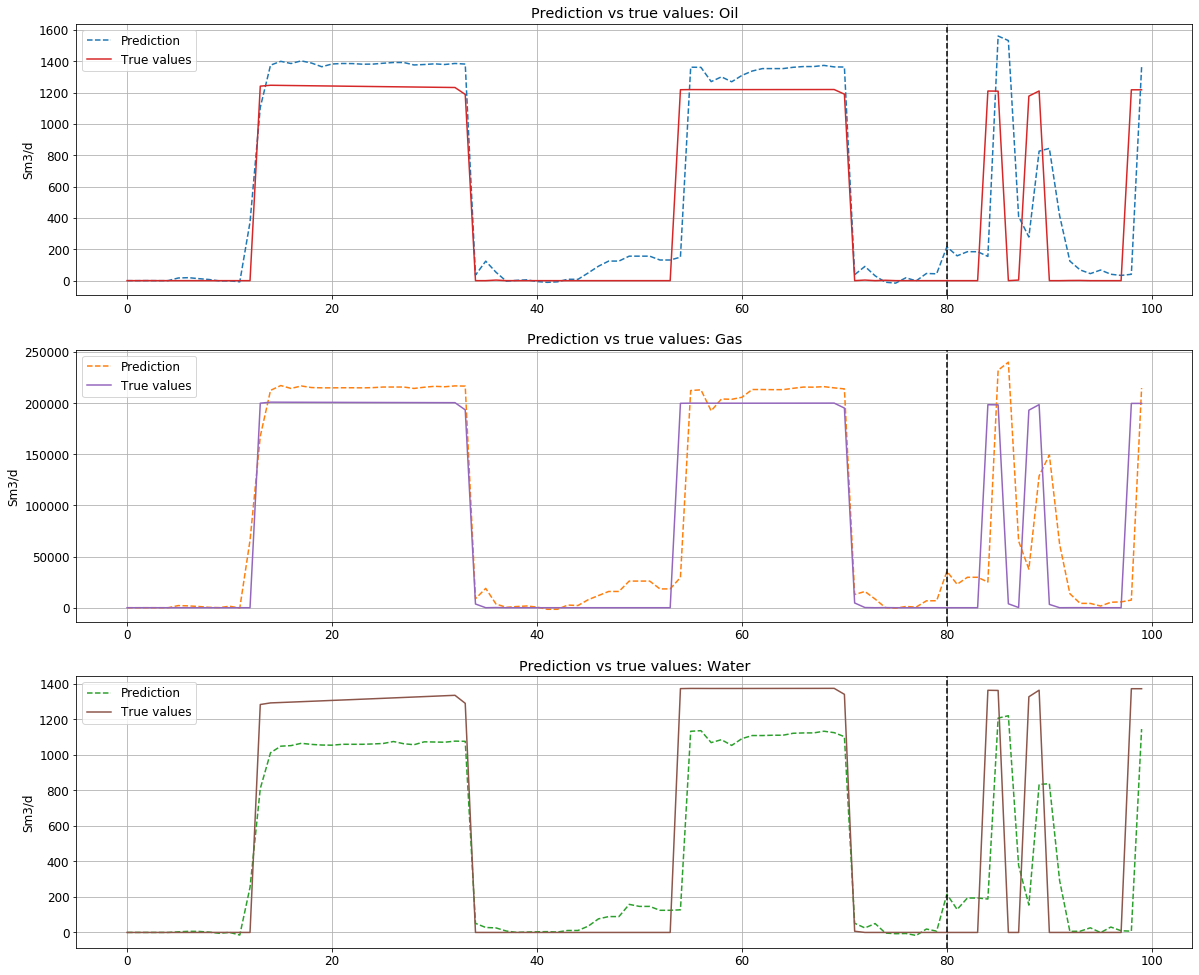

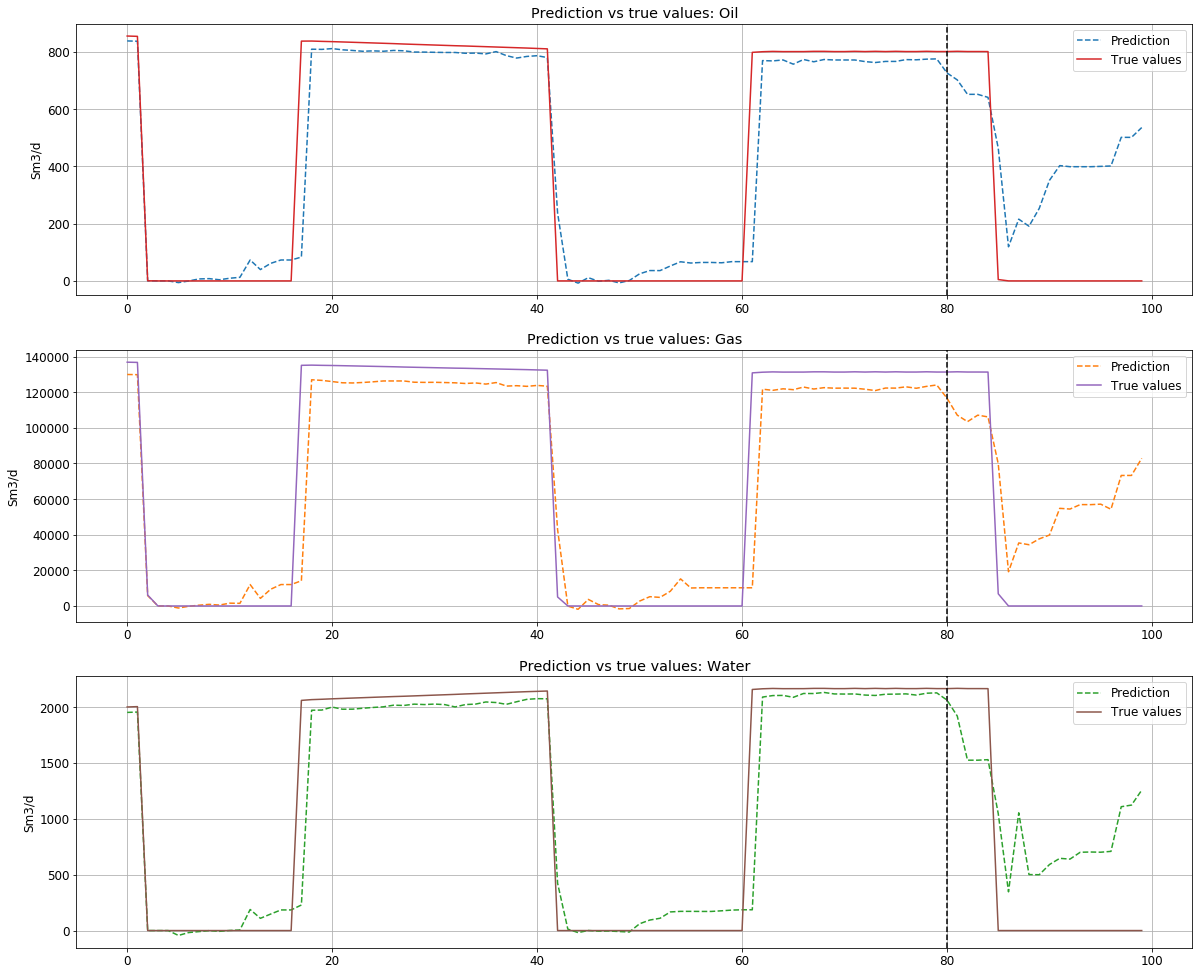

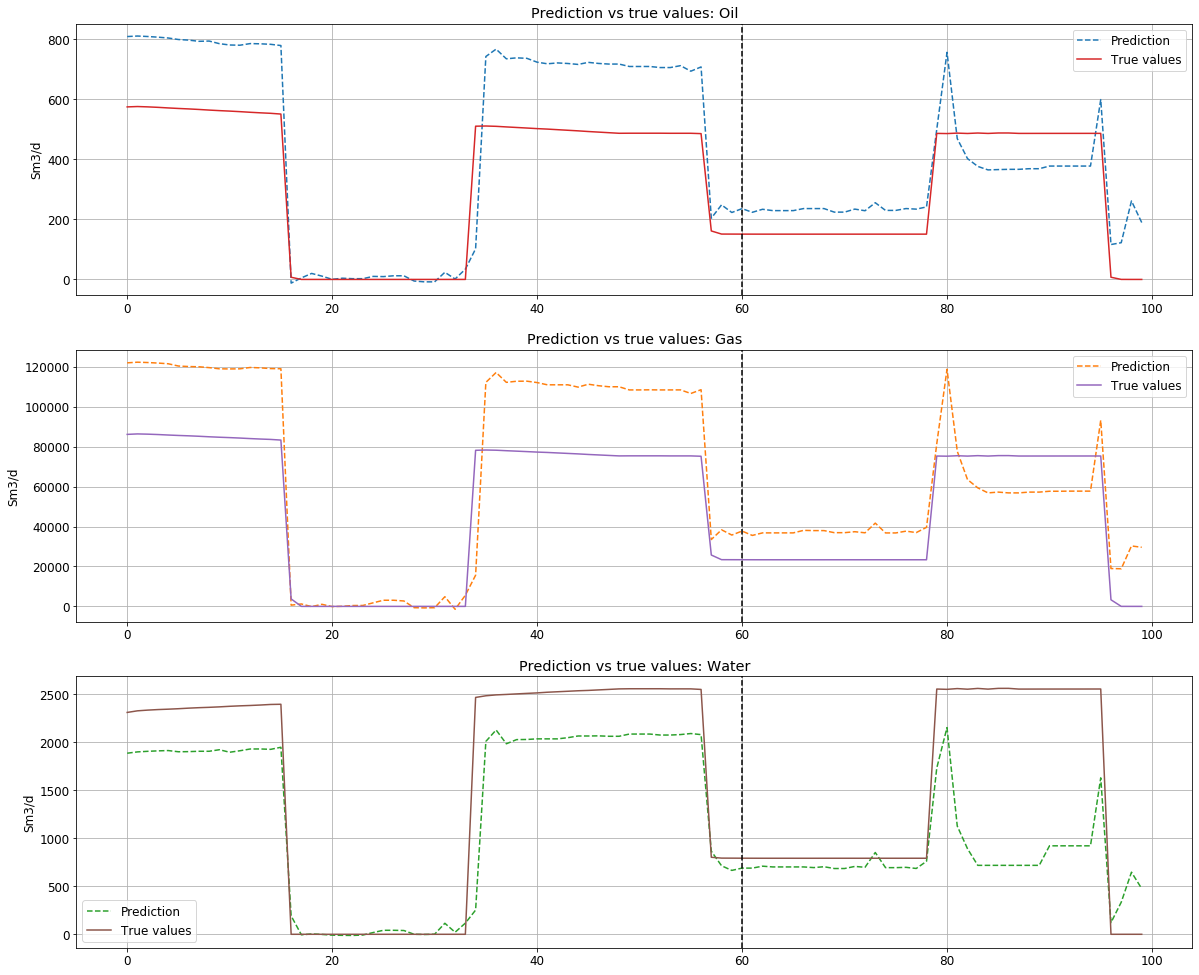

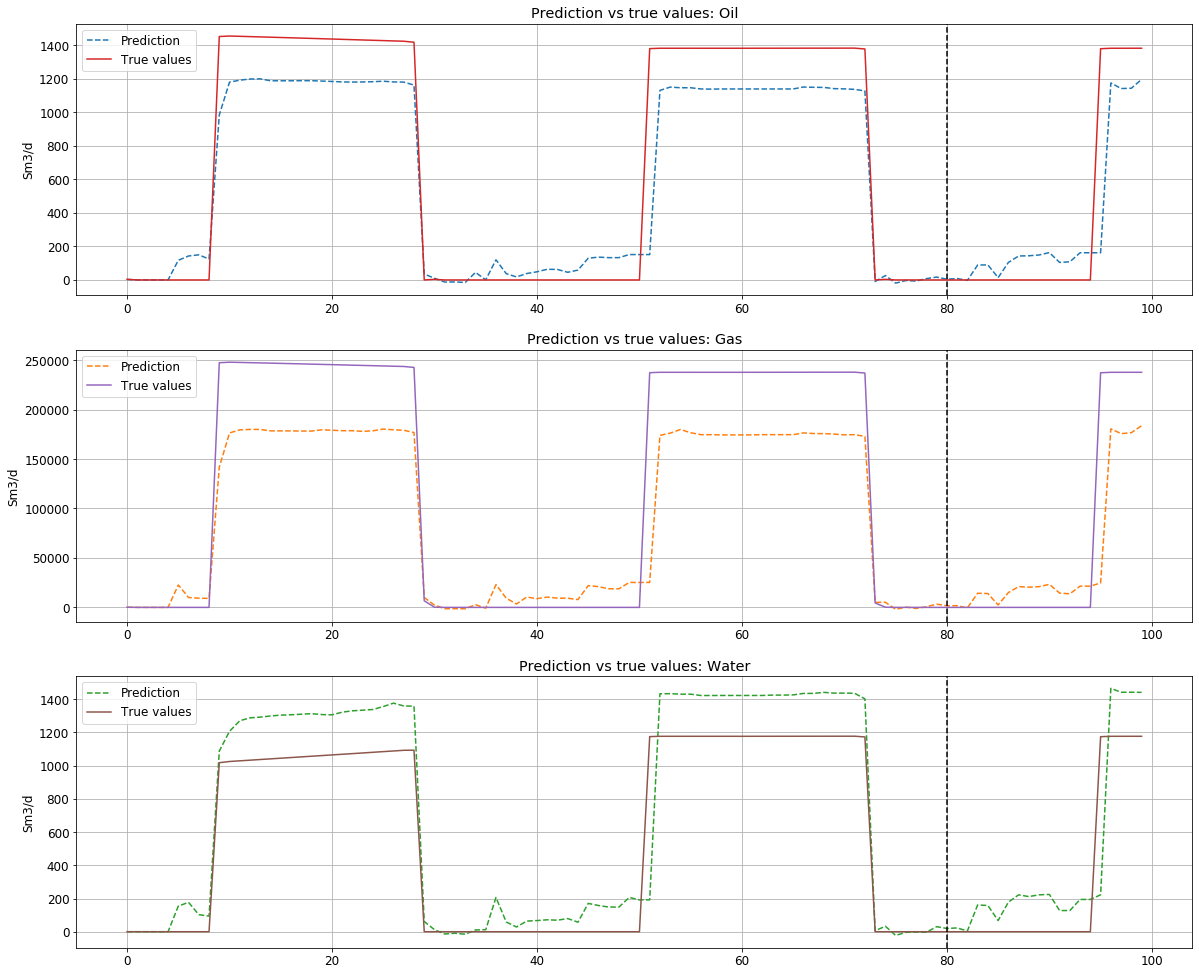

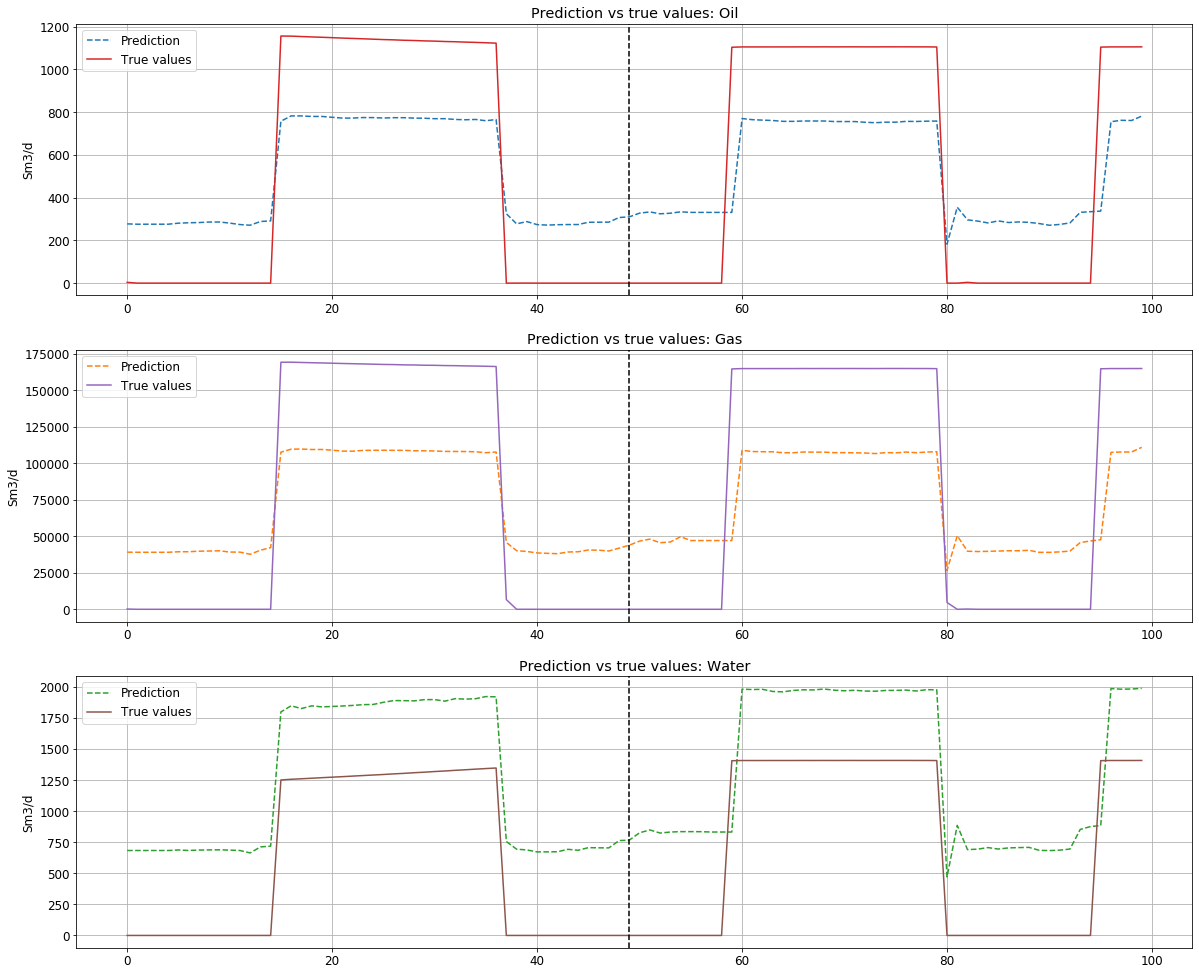

In [4]:
m = Gen(model_name='LGB-4', 
         study_path=STUDY_PATH, 
         real_file=REAL_FILE, 
         train_all_ratio=TRAIN_VAL_RATIO_GEN,
         gen_dfs_path=GEN_DFS_PATH,
         tpl_path=TPL_PATH,
         loss='mae',
         n_neurons=100,
         max_depth=4,
         reg_alpha=1)

m.train()
err, t = m.predict(plot_losses=True, plot_preds=True, plot_errs=False, print_res=False)
m.print_info()
m.save()

## XGBoost

C:\Users\Asus\Anaconda3\lib\site-packages\xgboost\data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


Train error:      34.328
Test error:       36.578
Training time:    9.500 s

train/all: 0.8
n_steps: 5
n_features_in: 6, n_features_out: 3
loss metric: mae
layers: 3, neurons: 100, droupout: 0.2
C:/Users/Asus/Desktop/Skoltech/Multiphase flows/data/Subsea_Study[1-4-7]/XGB-4.hdf saved


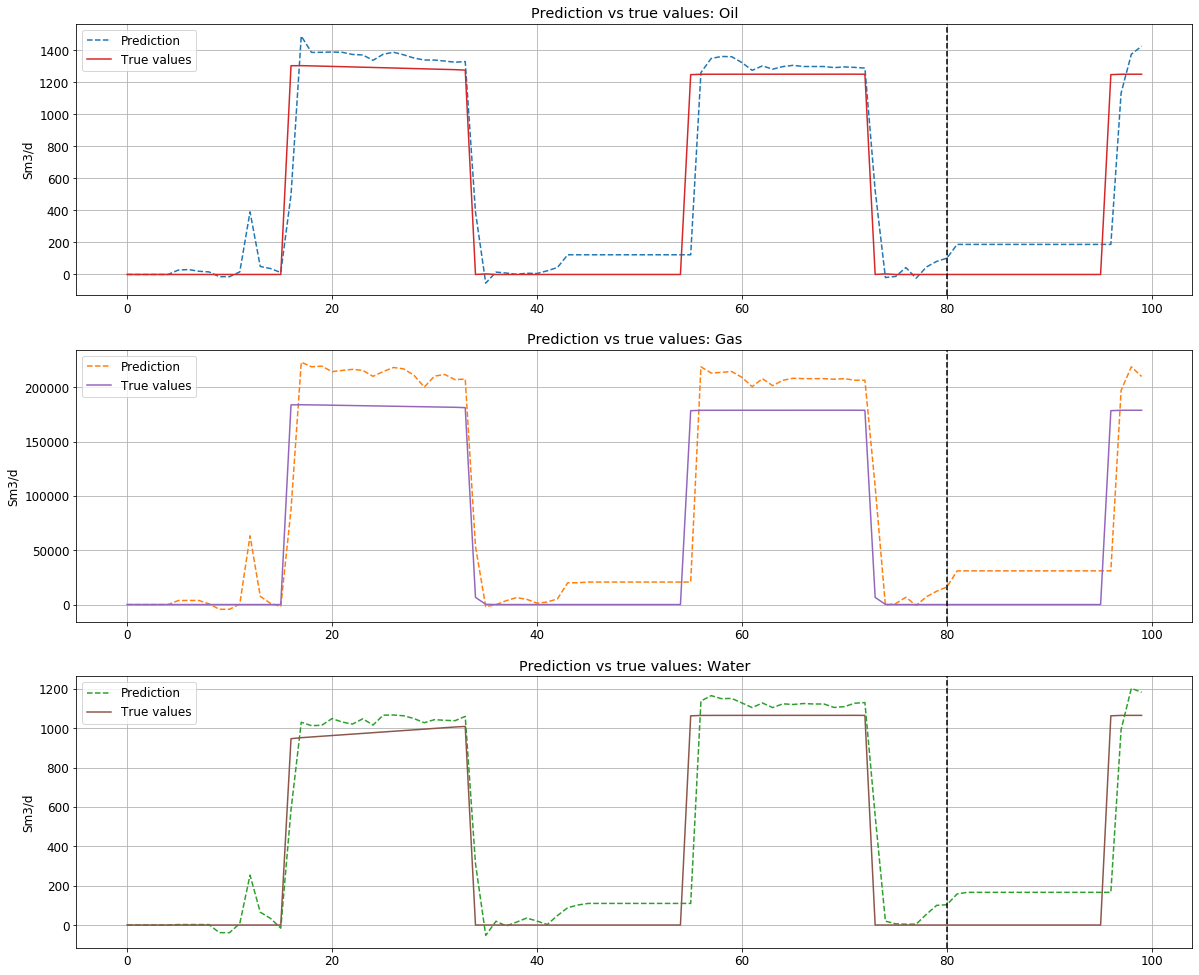

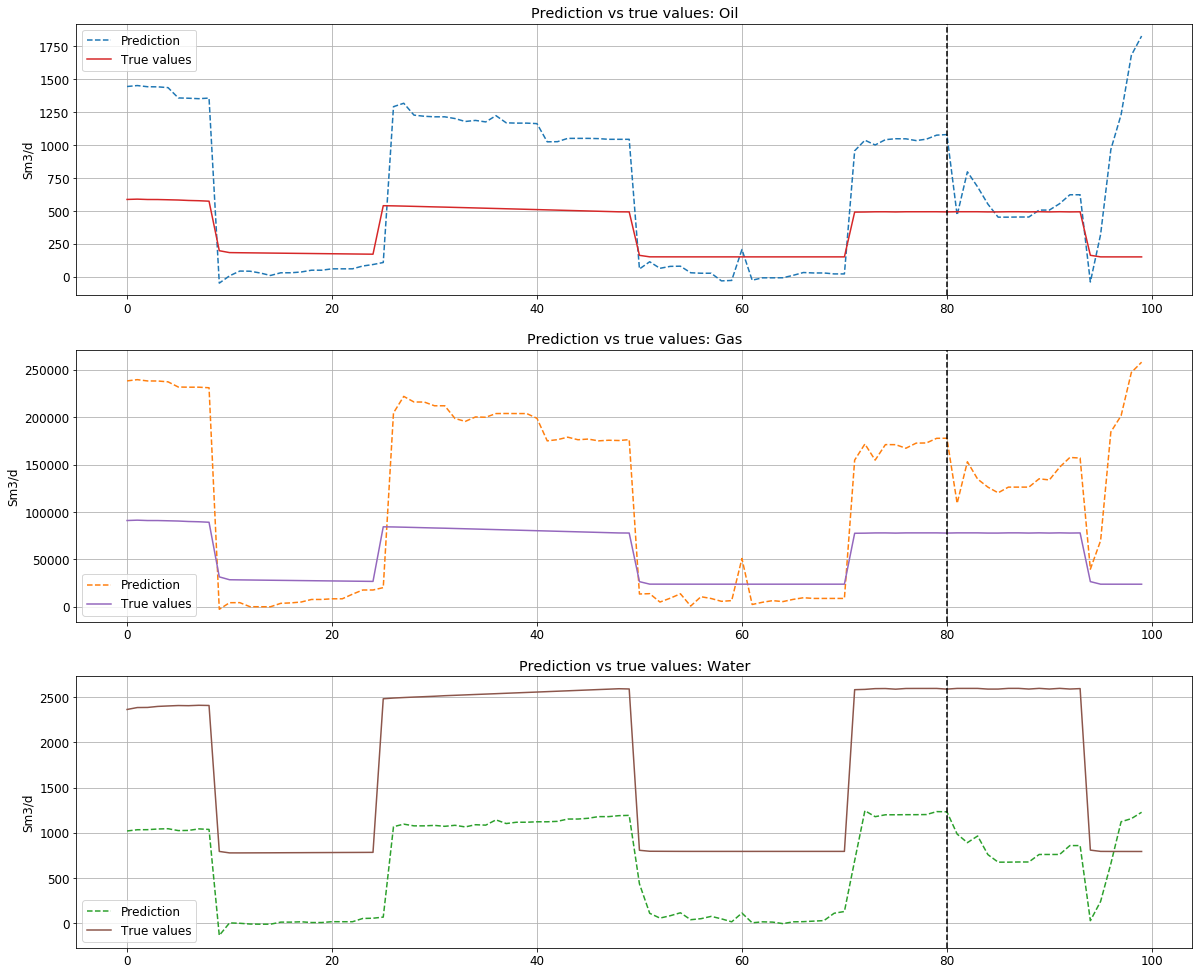

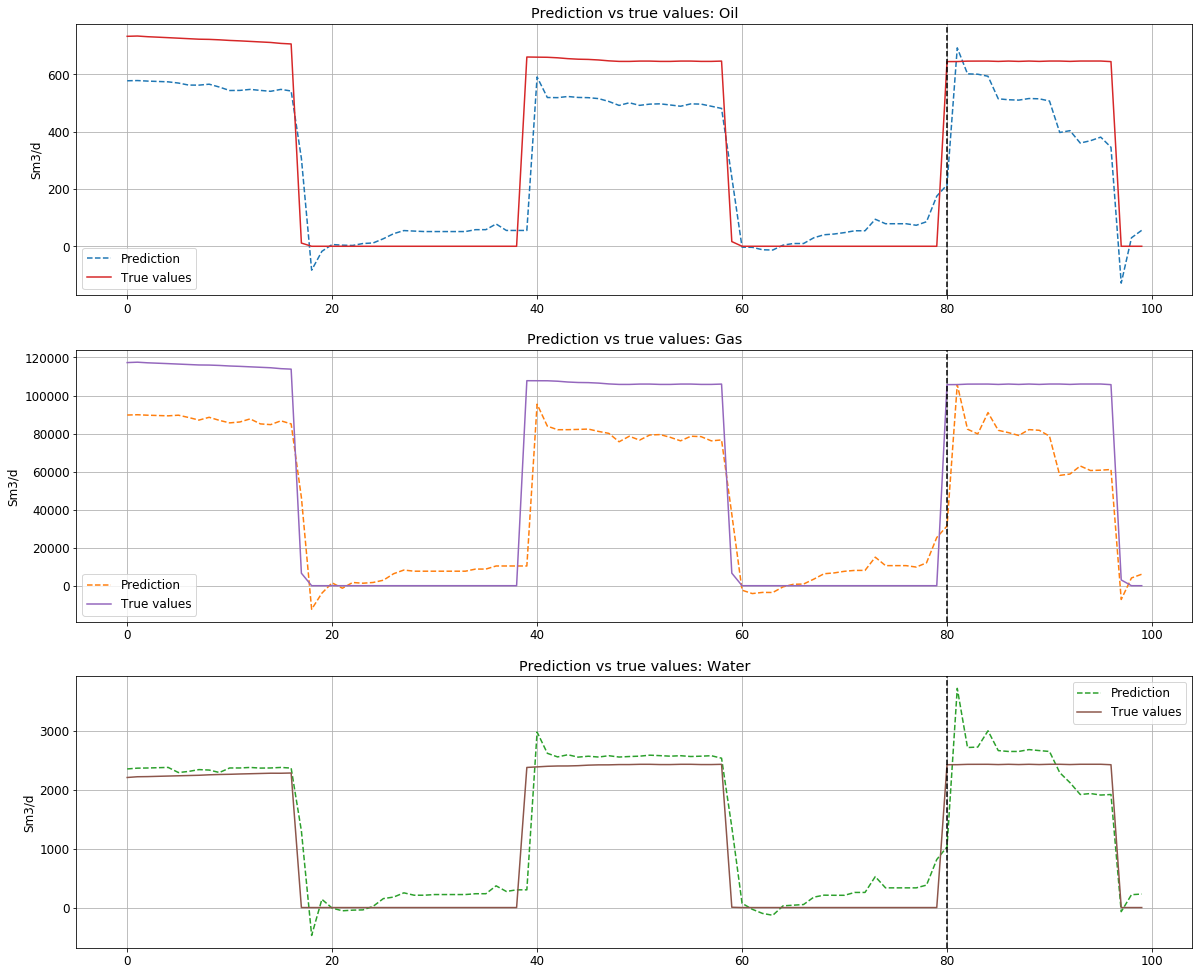

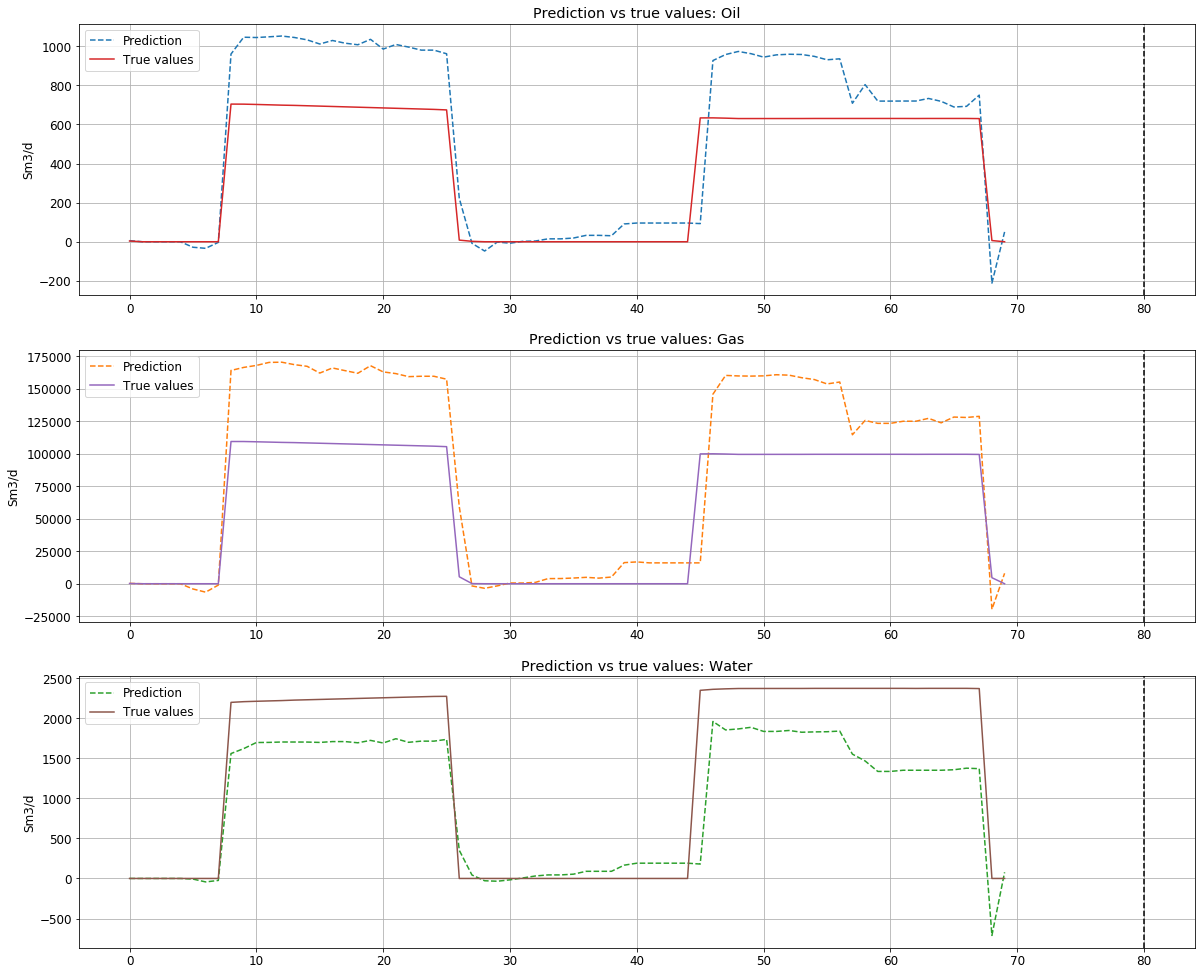

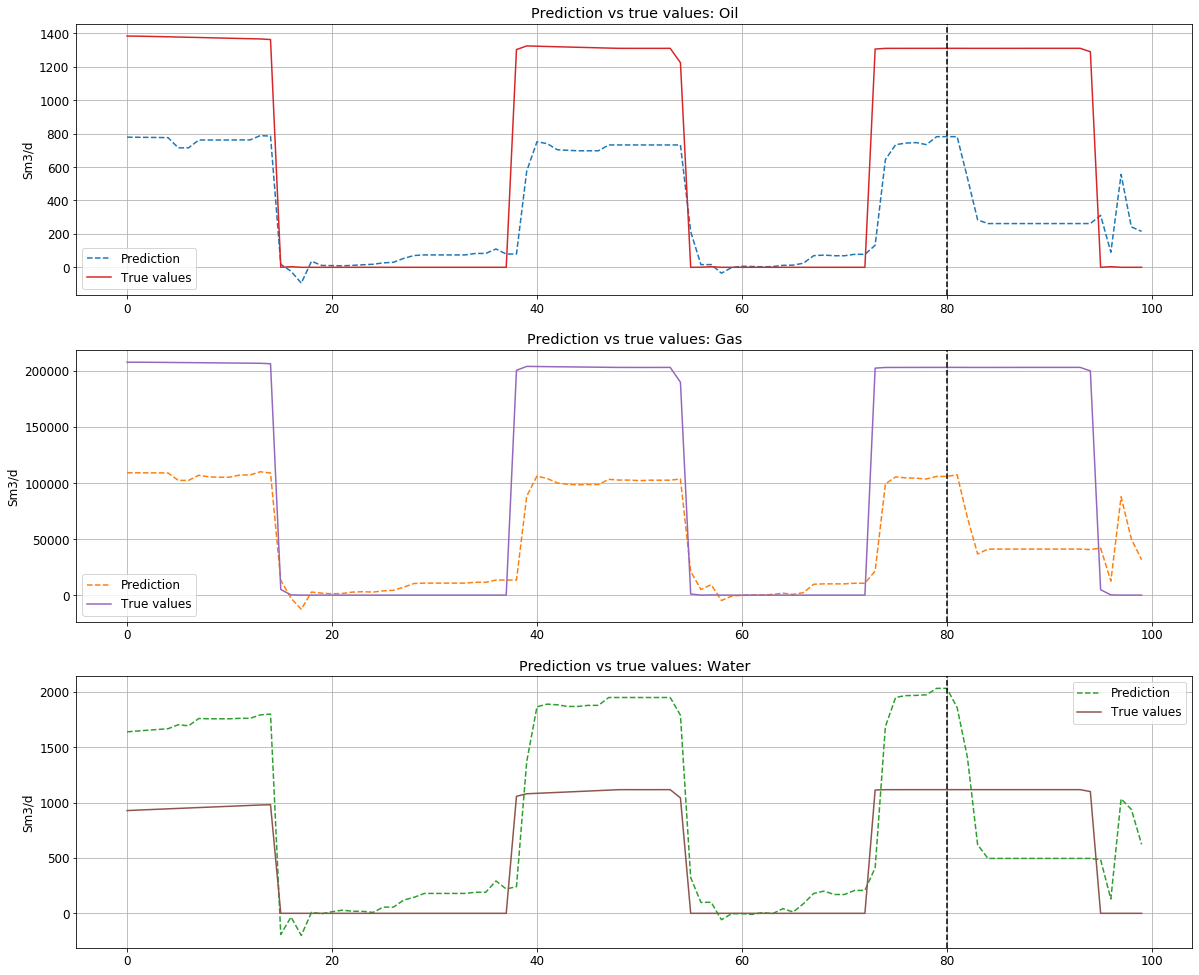

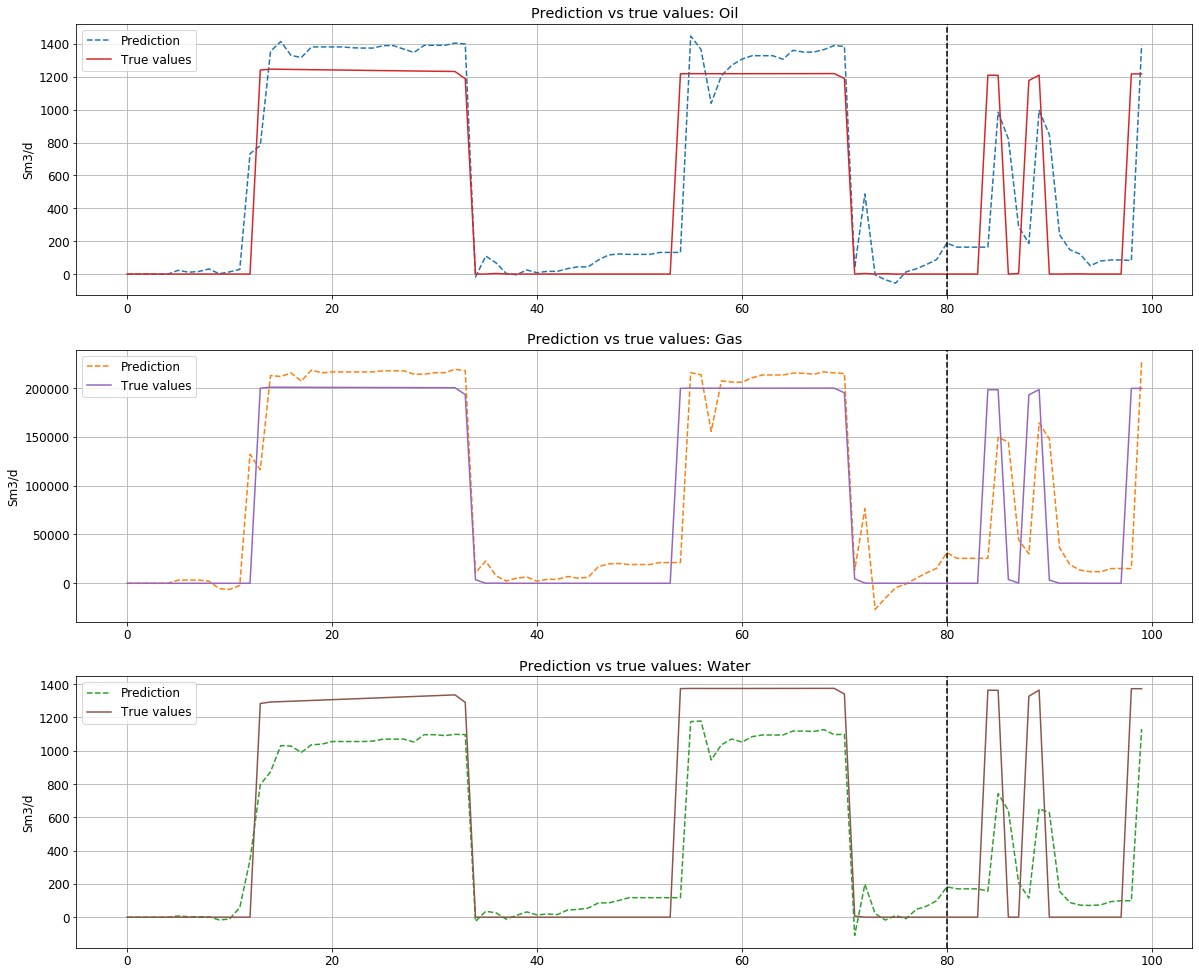

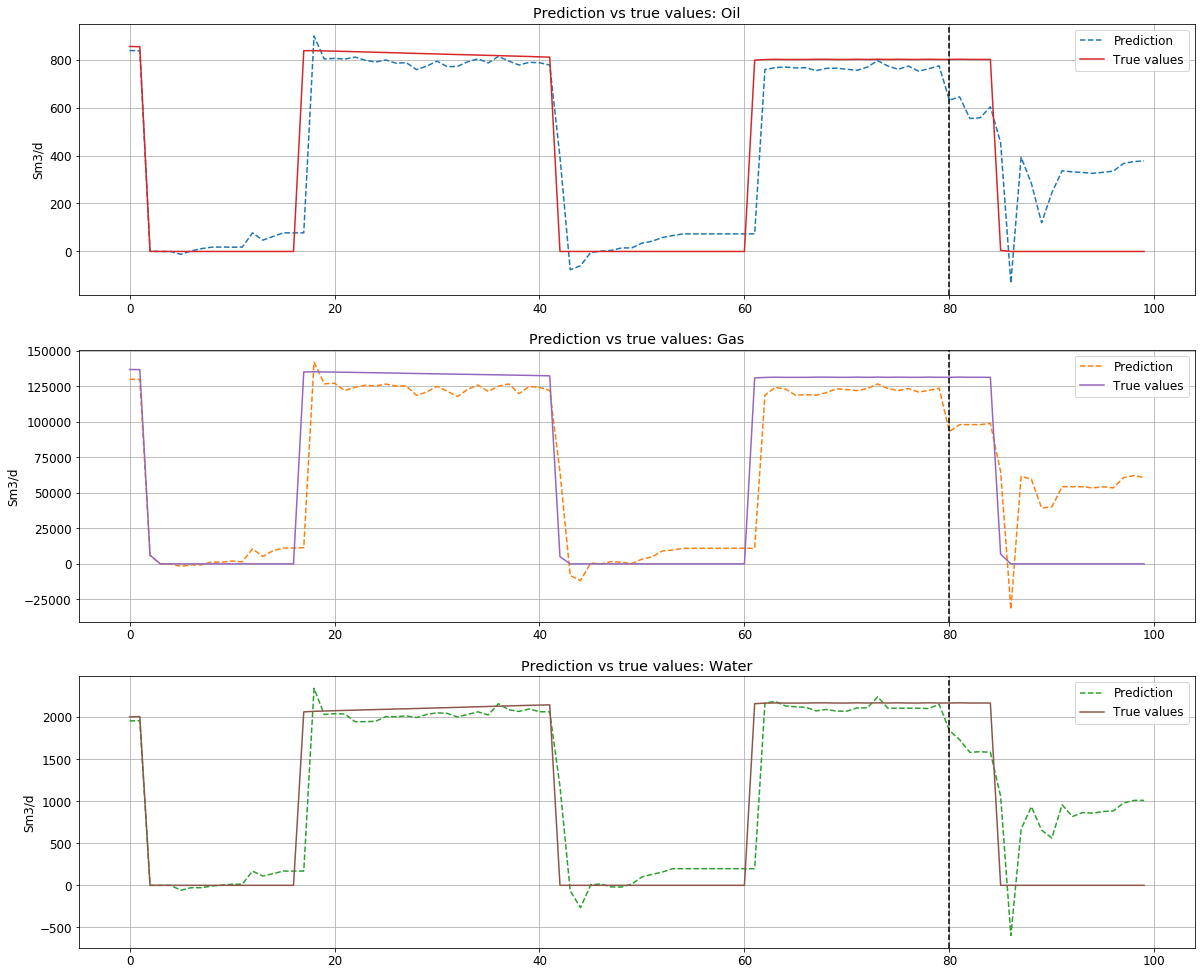

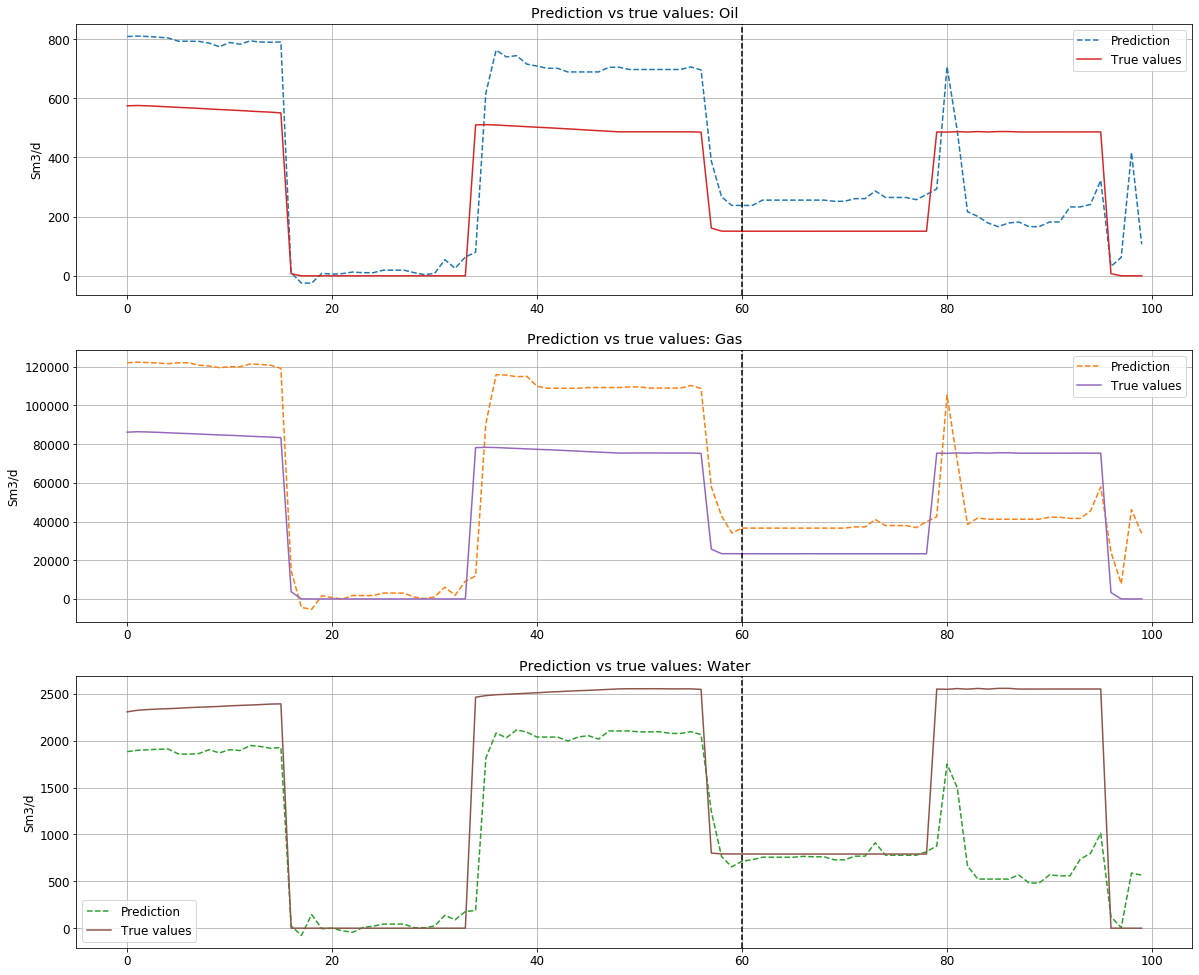

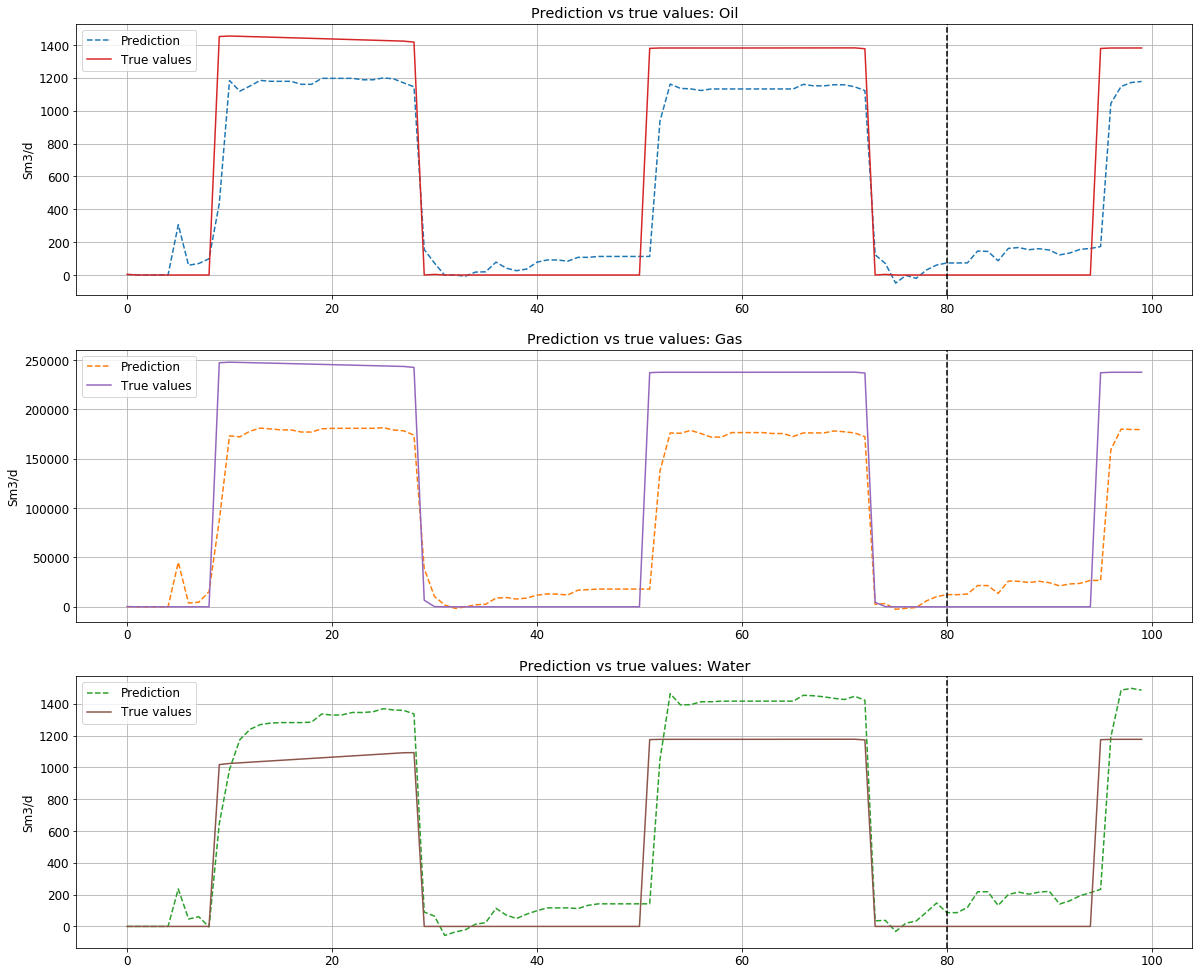

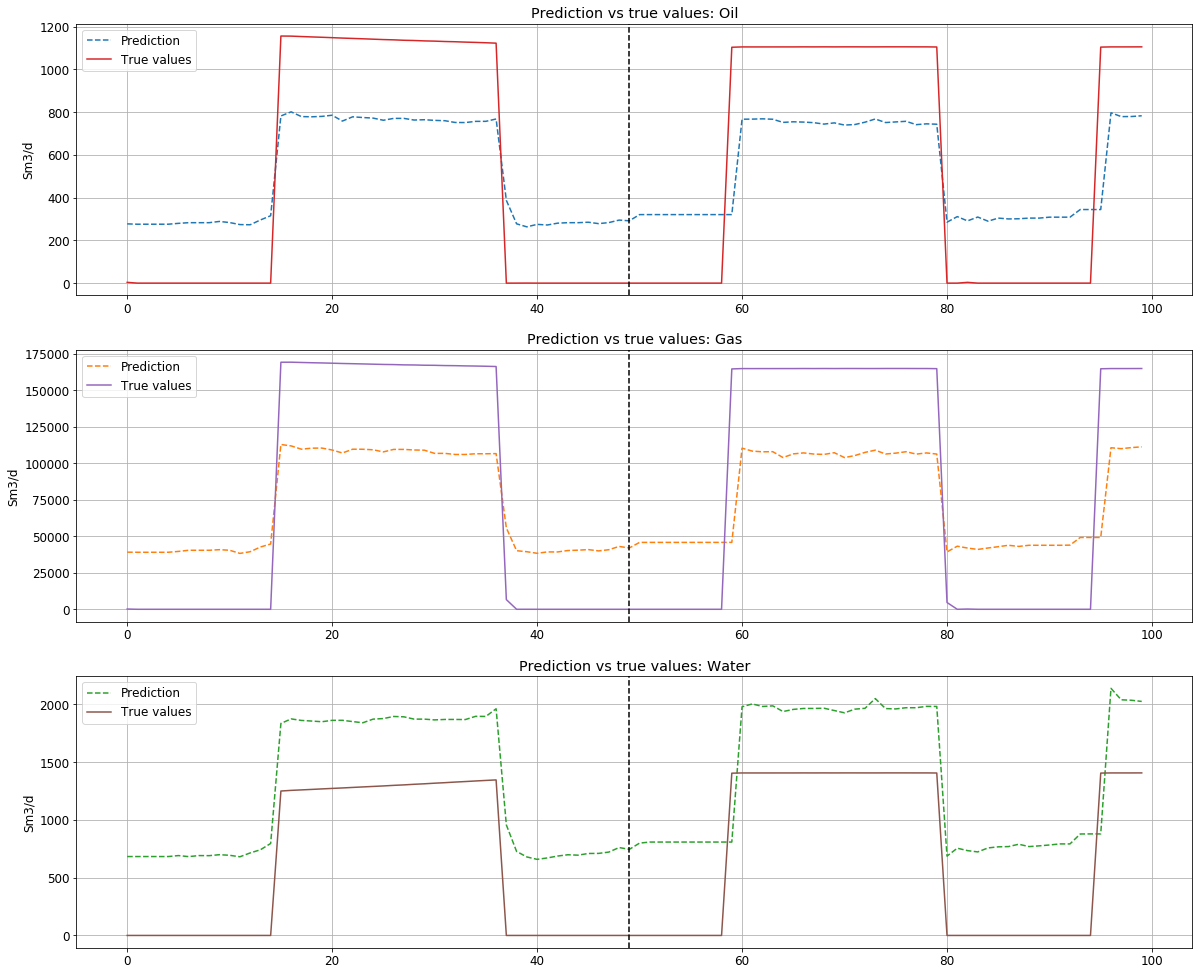

In [6]:
m = Gen(model_name='XGB-4', 
         study_path=STUDY_PATH, 
         real_file=REAL_FILE, 
         train_all_ratio=TRAIN_VAL_RATIO_GEN,
         gen_dfs_path=GEN_DFS_PATH,
         tpl_path=TPL_PATH,
         loss='mae',
         n_neurons=100,
         max_depth=2,
         reg_alpha=1)

m.train()
err, t = m.predict(plot_losses=True, plot_preds=True, plot_errs=False, print_res=False)
m.print_info()
m.save()

## RF

Train error:      33.881
Test error:       35.727
Training time:    361.000 s

train/all: 0.8
n_steps: 5
n_features_in: 6, n_features_out: 3
loss metric: mae
layers: 3, neurons: 100, droupout: 0.2
C:/Users/Asus/Desktop/Skoltech/Multiphase flows/data/Subsea_Study[1-4-7]/RF-4.hdf saved


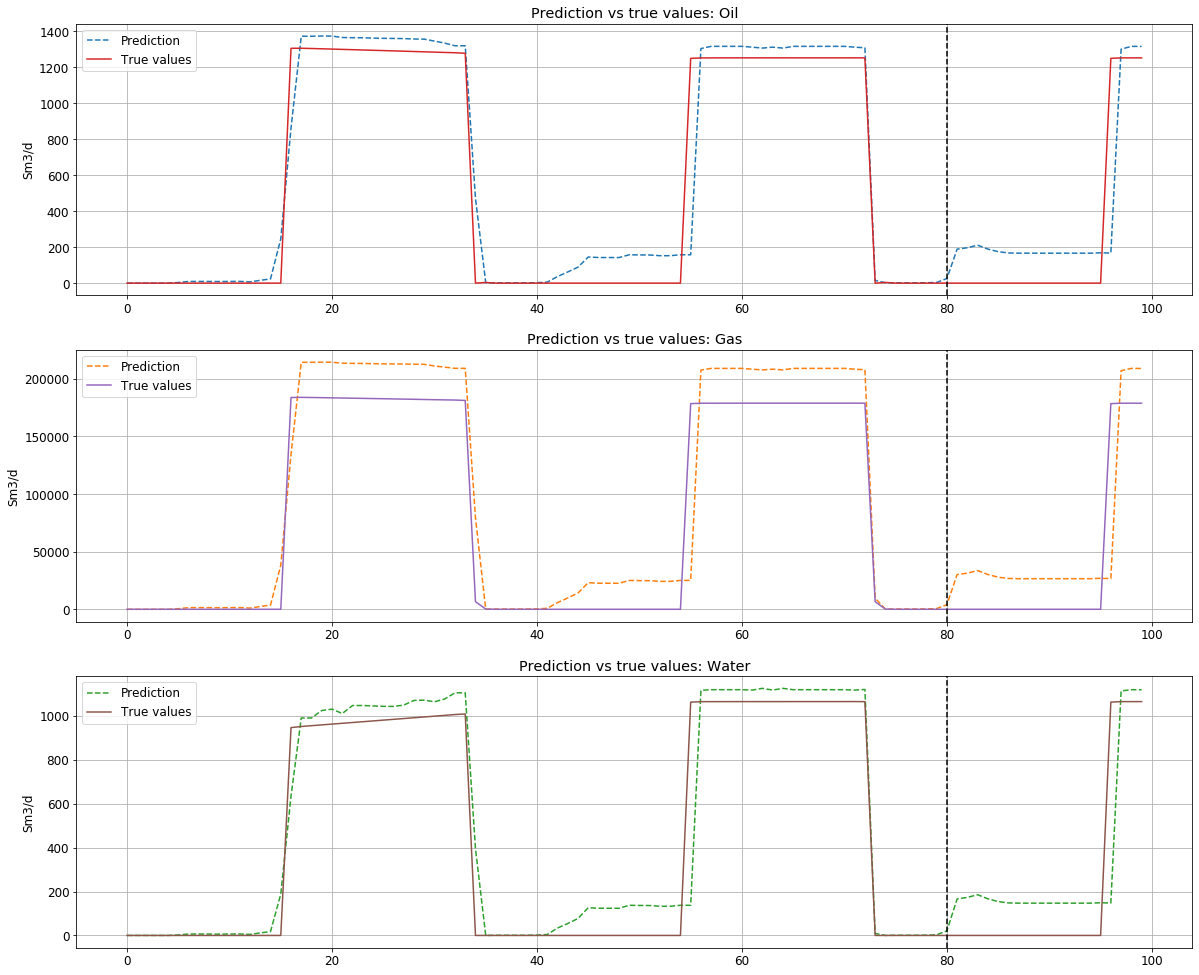

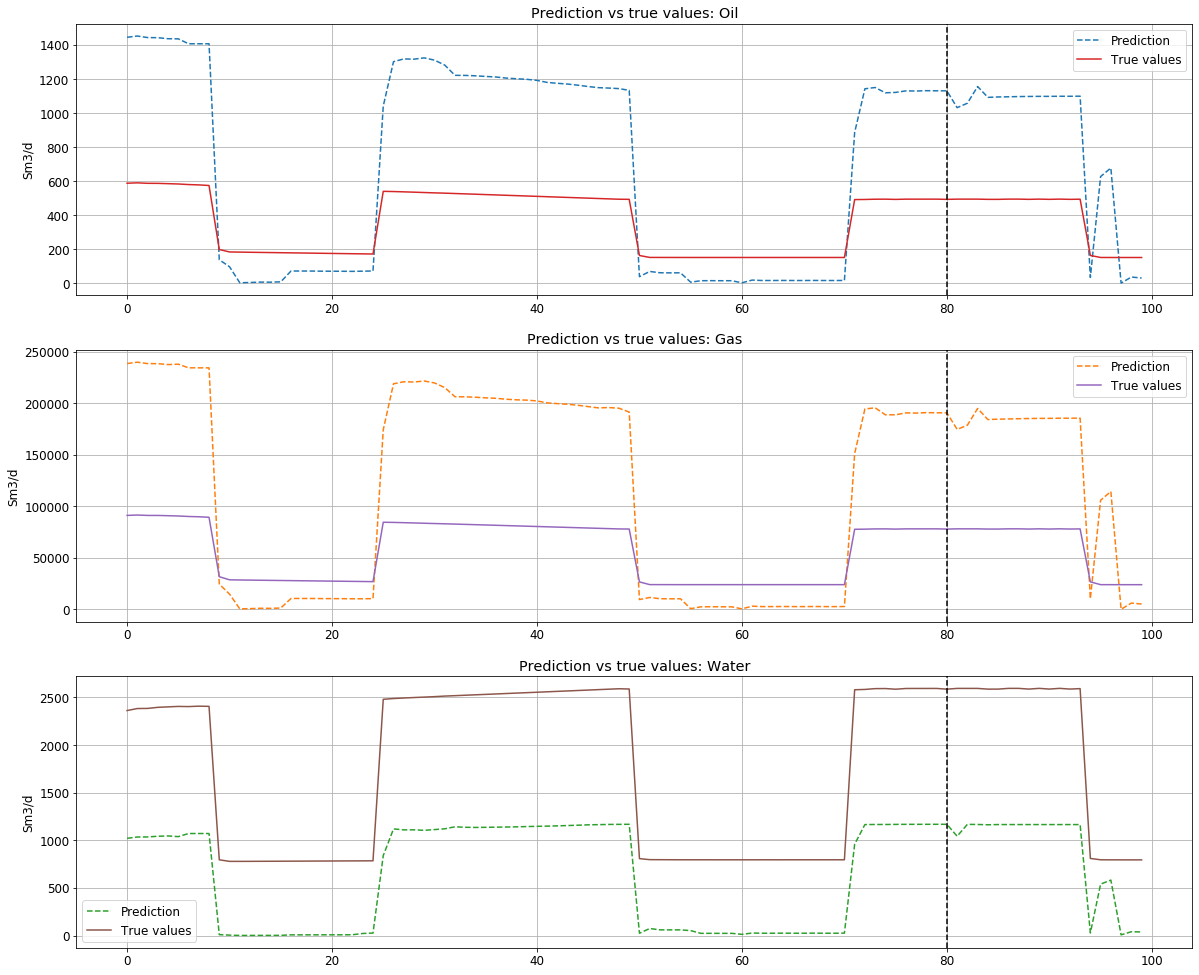

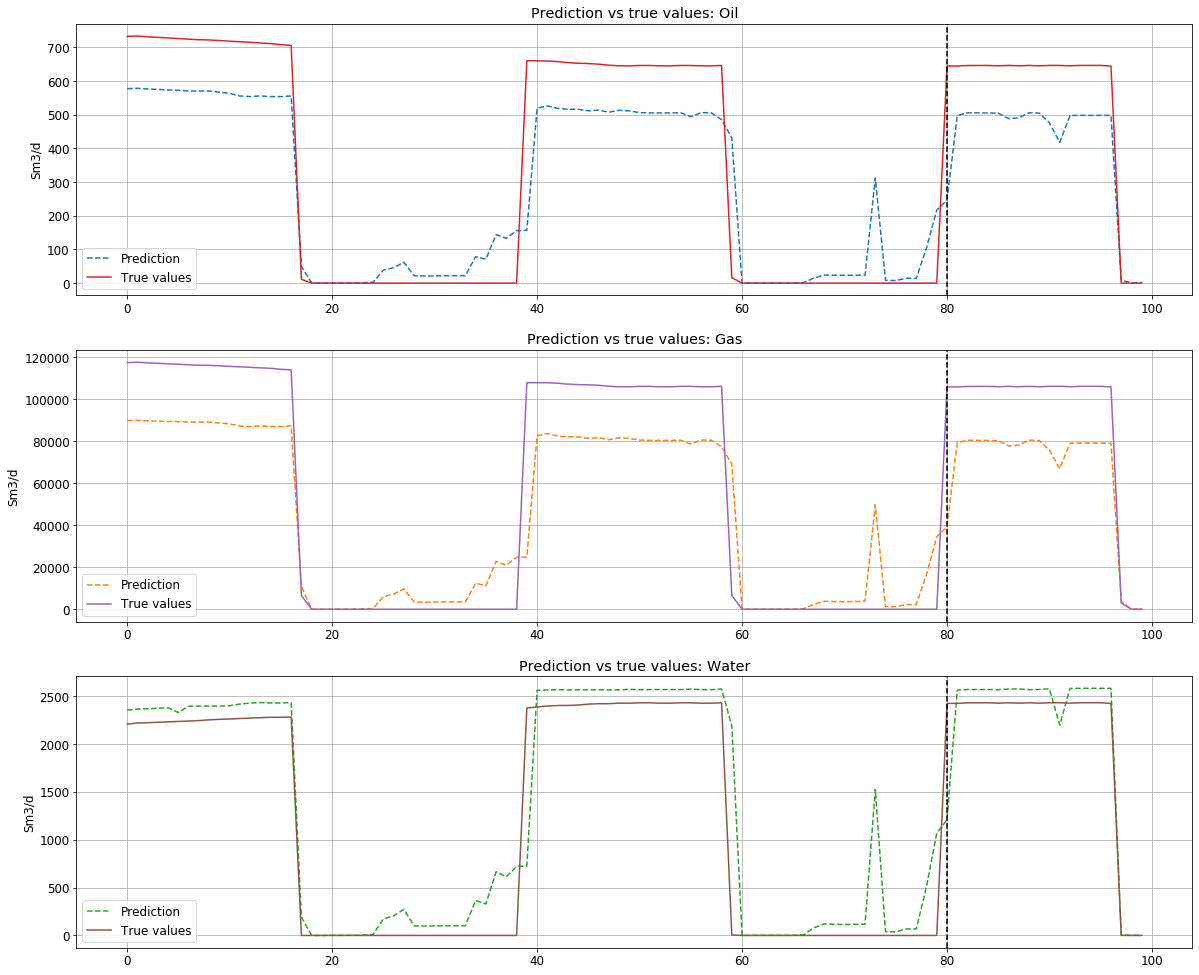

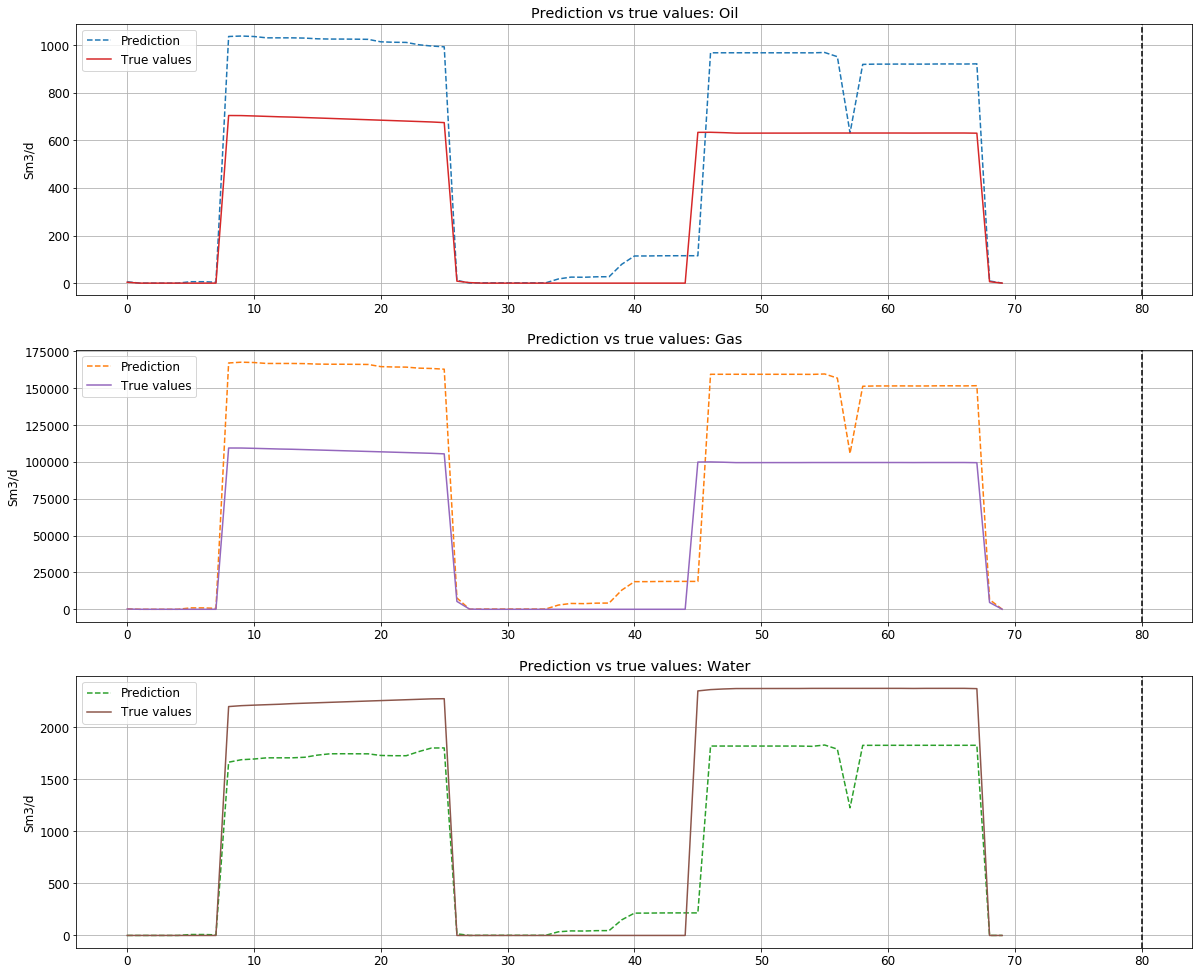

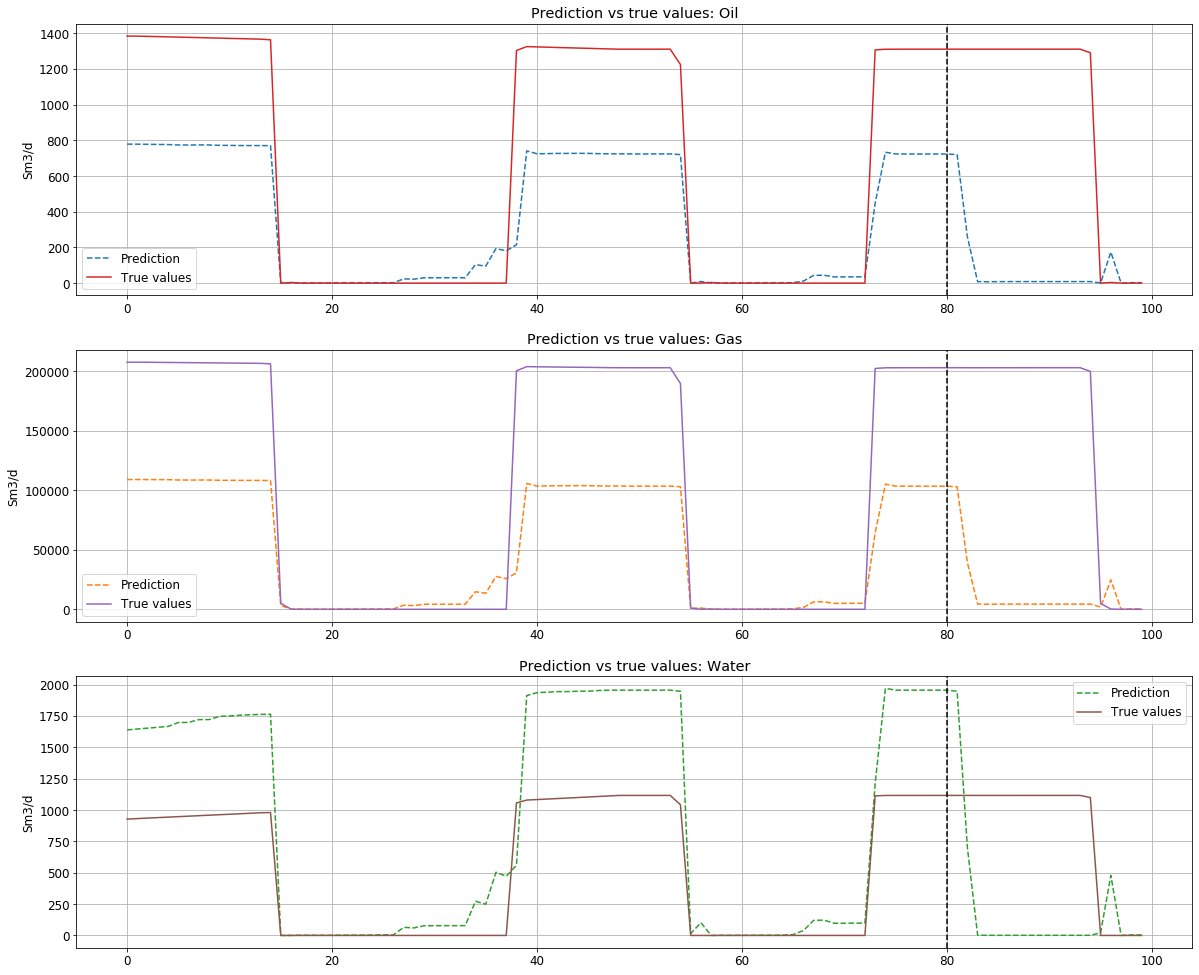

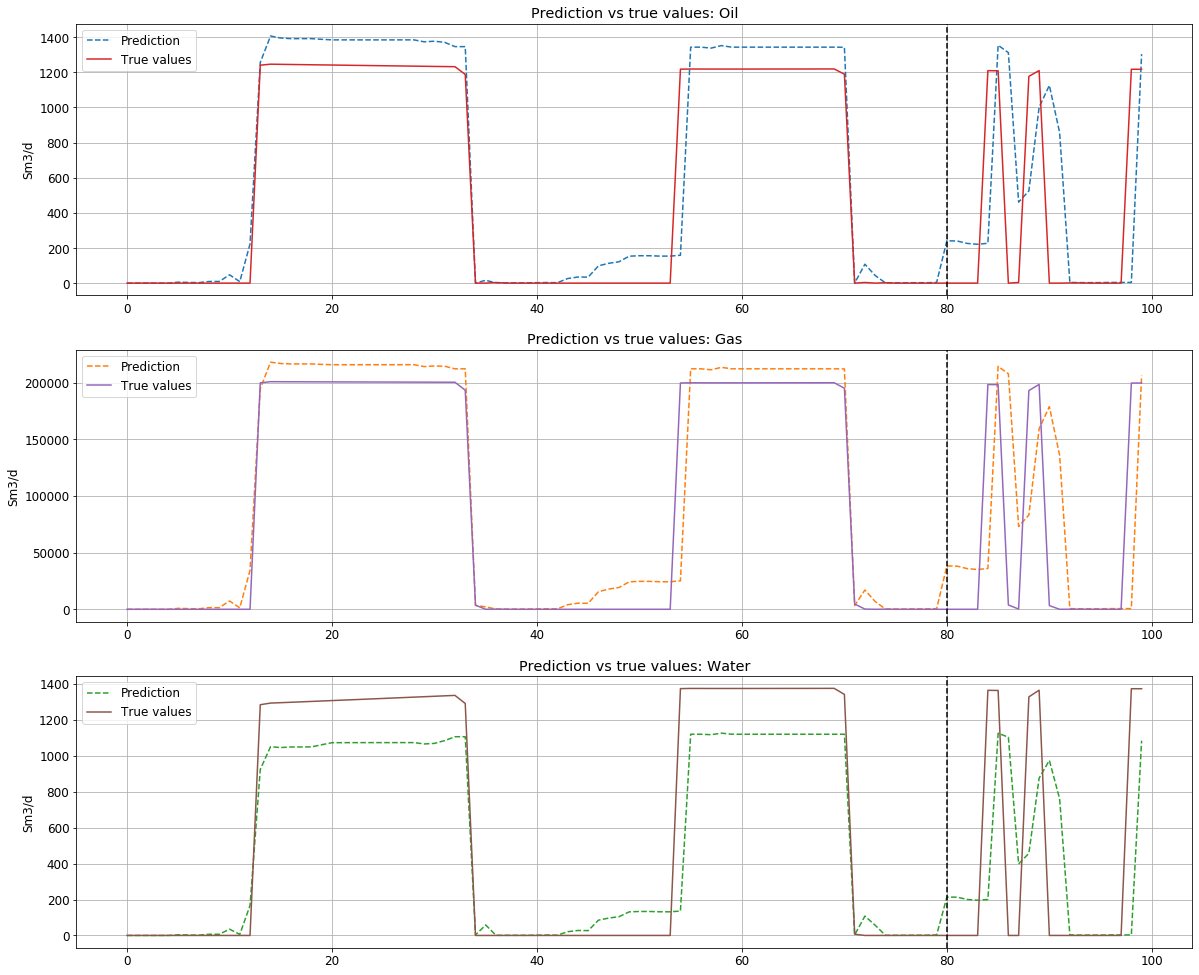

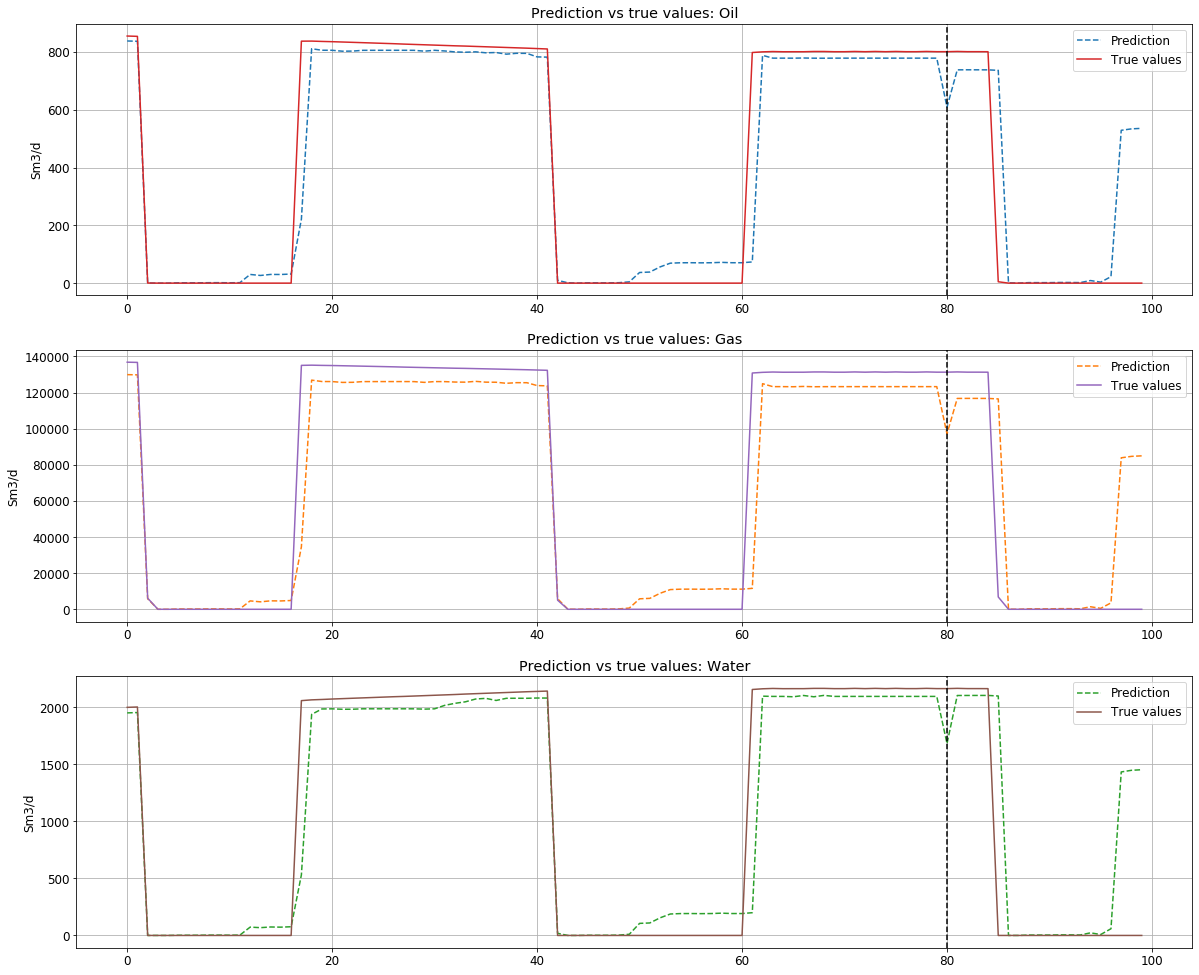

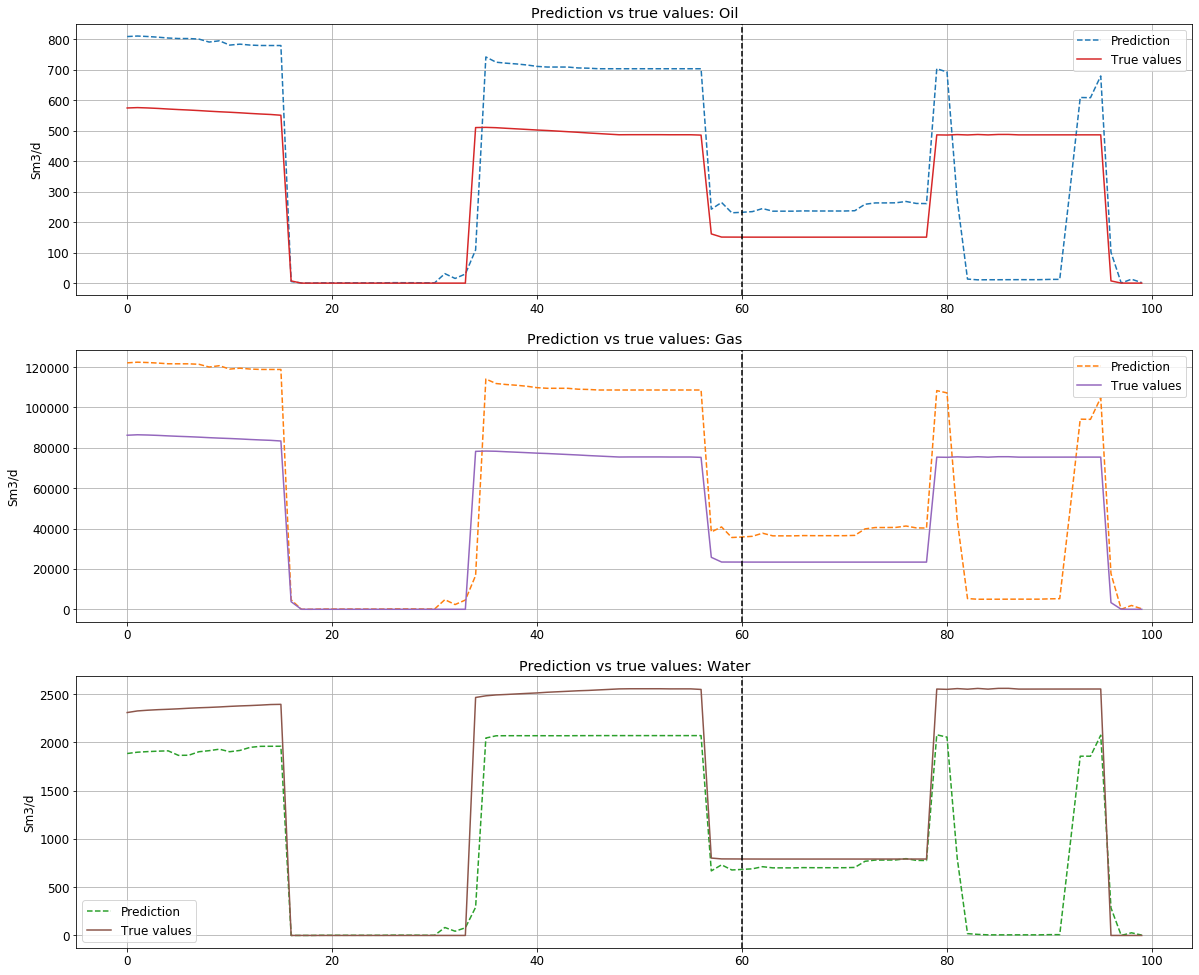

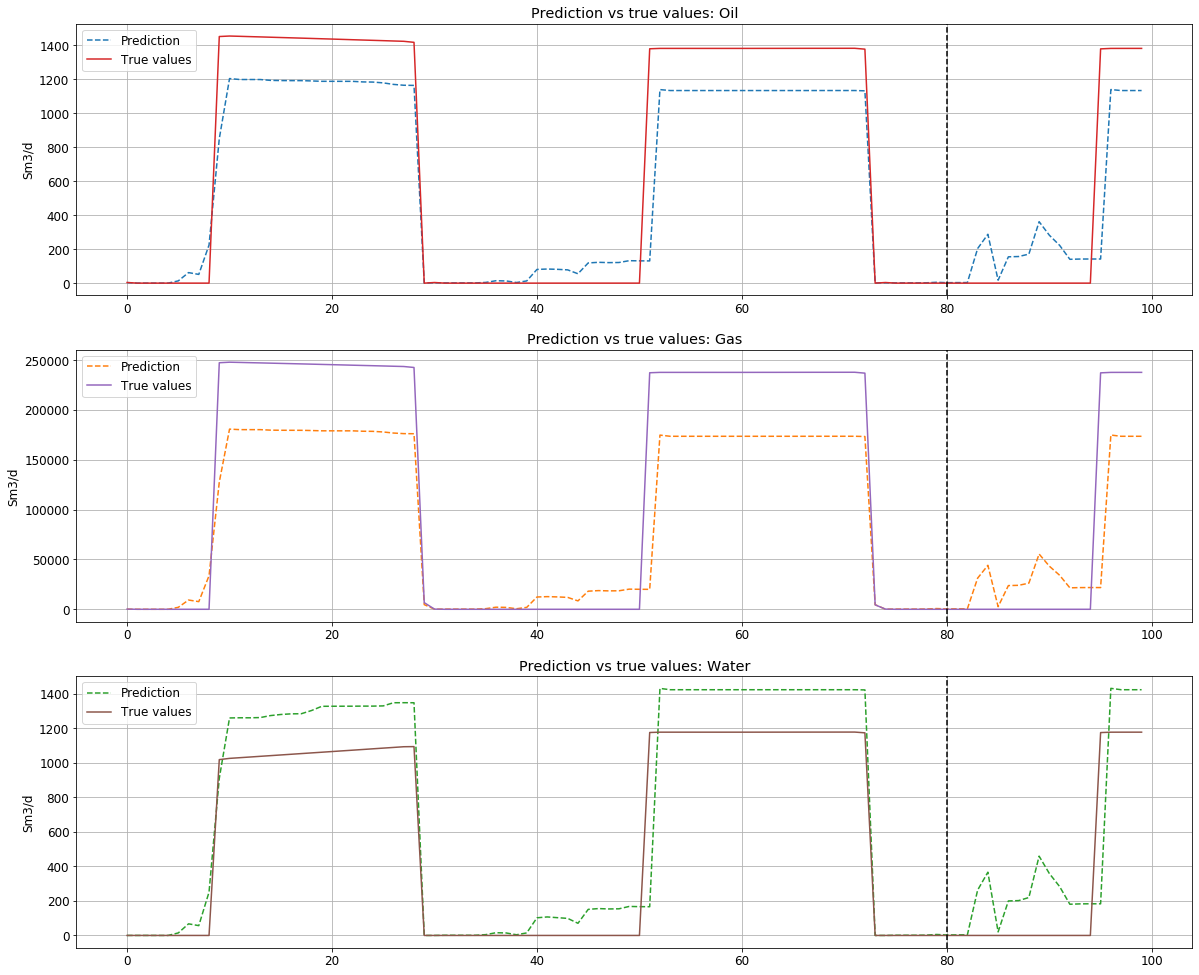

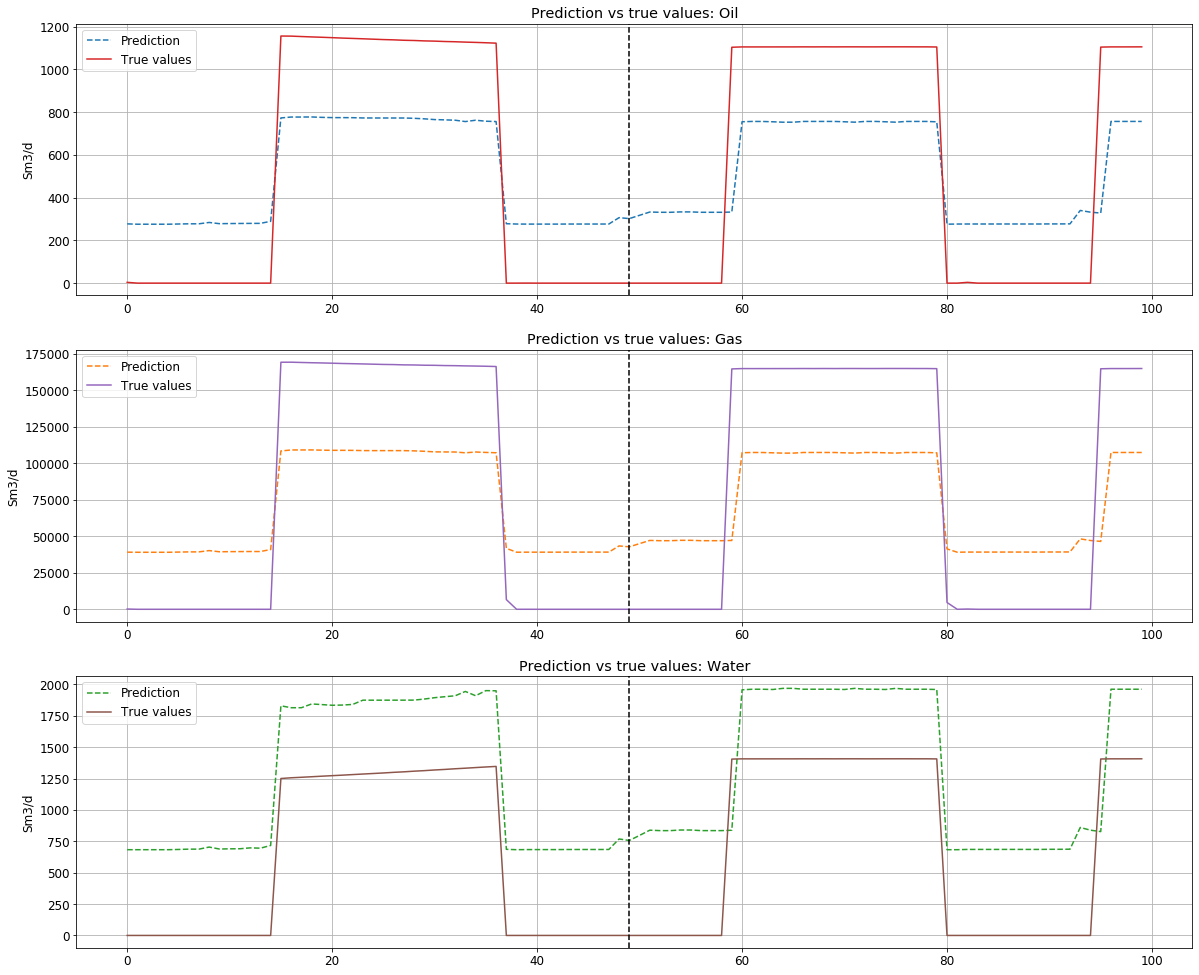

In [5]:
m = Gen(model_name='RF-4', 
         study_path=STUDY_PATH, 
         real_file=REAL_FILE, 
         train_all_ratio=TRAIN_VAL_RATIO_GEN,
         gen_dfs_path=GEN_DFS_PATH,
         tpl_path=TPL_PATH,
         loss='mae',
         n_neurons=100,
         max_depth=2,
         reg_alpha=1)

m.train()
err, t = m.predict(plot_losses=True, plot_preds=True, plot_errs=False, print_res=False)
m.print_info()
m.save()

## MLP

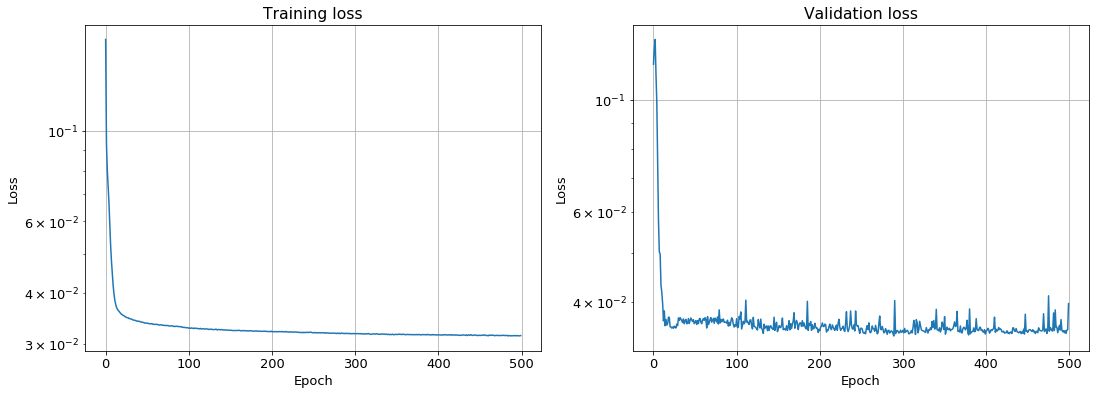

Train error:      34.448
Test error:       34.491
Training time:    2078.000 s

train/all: 0.8
n_steps: 5
n_features_in: 6, n_features_out: 3
loss metric: mae
layers: 3, neurons: 100, droupout: 0.2


C:\Users\Asus\Anaconda3\lib\site-packages\keras\engine\saving.py:165: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '


C:/Users/Asus/Desktop/Skoltech/Multiphase flows/data/Subsea_Study[1-4-7]/MLP-4.hdf saved


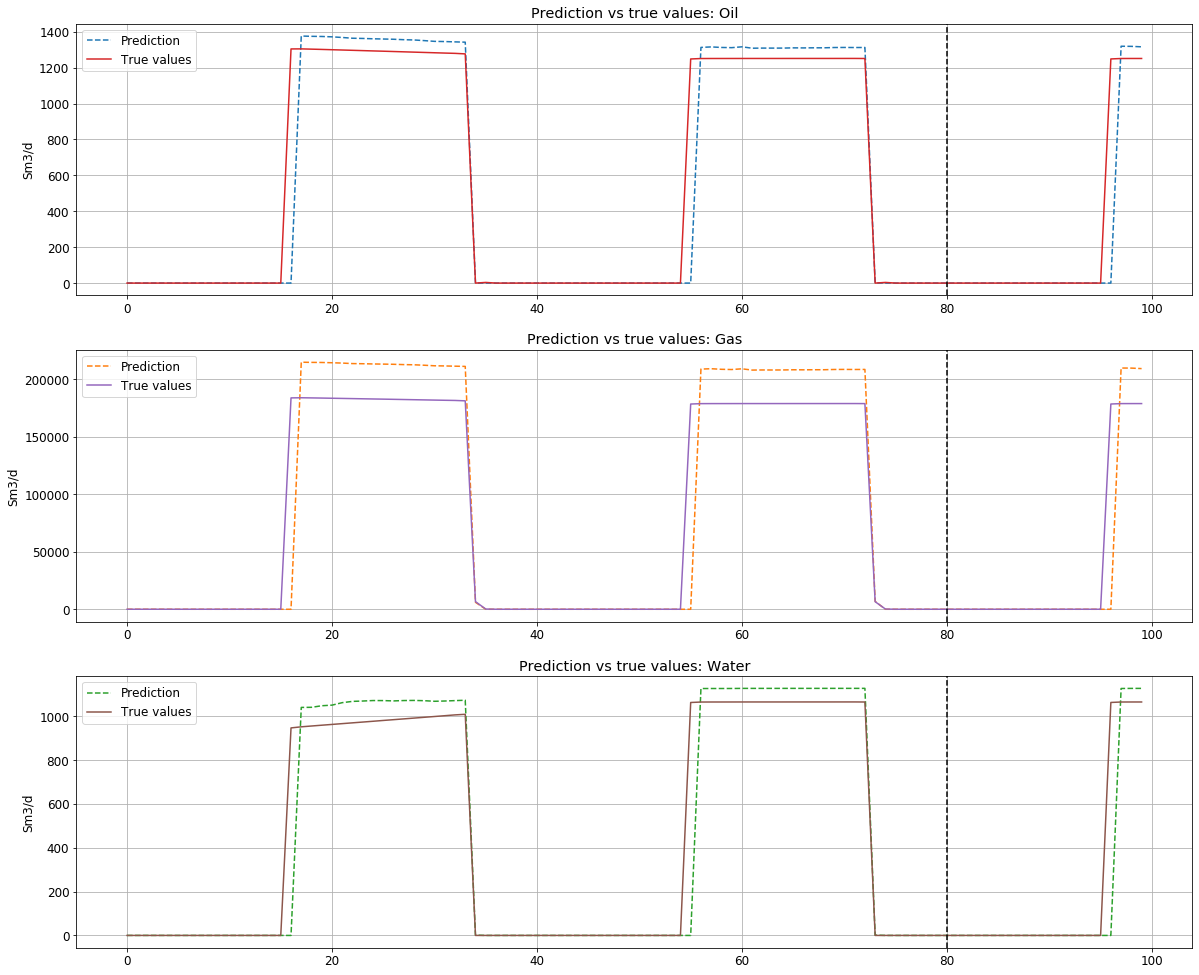

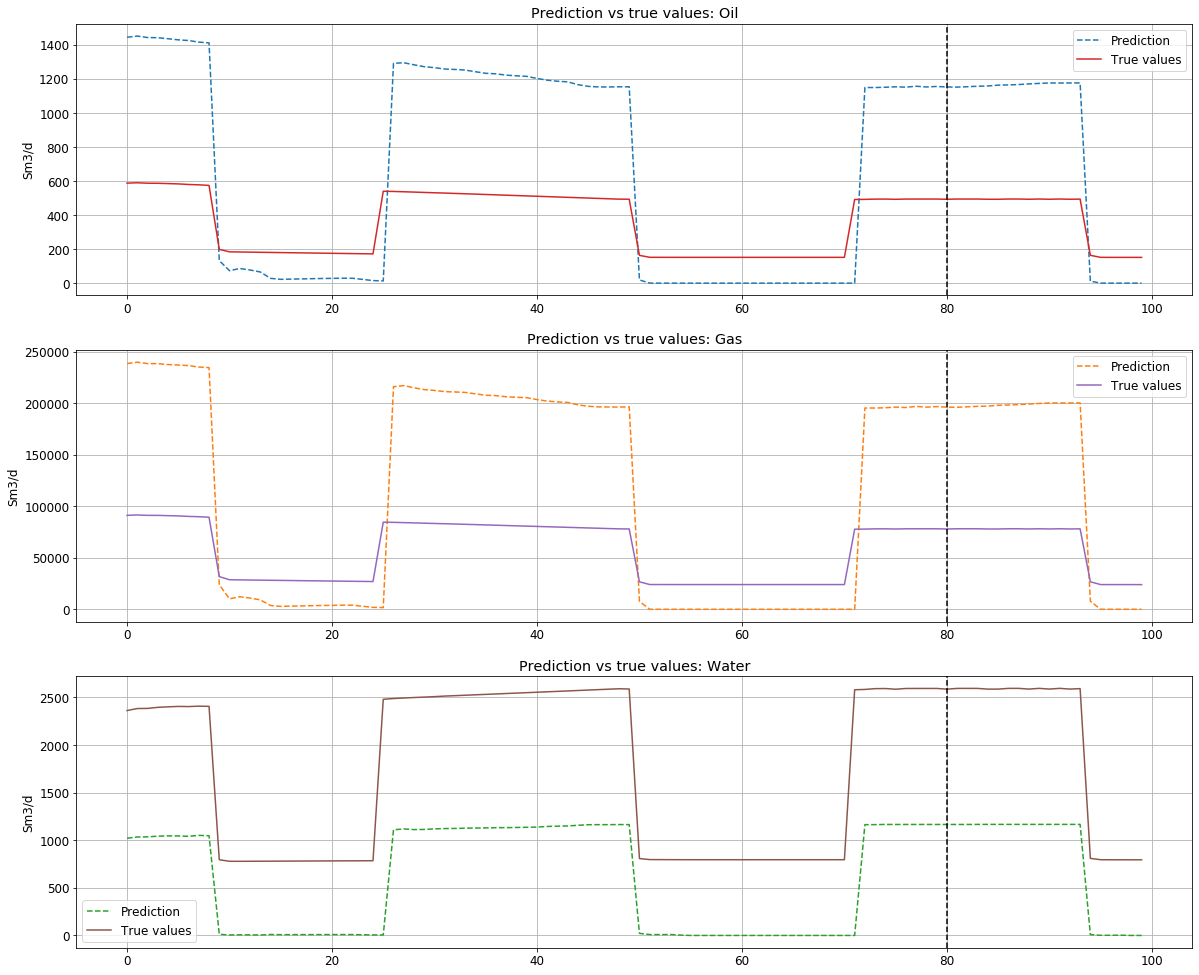

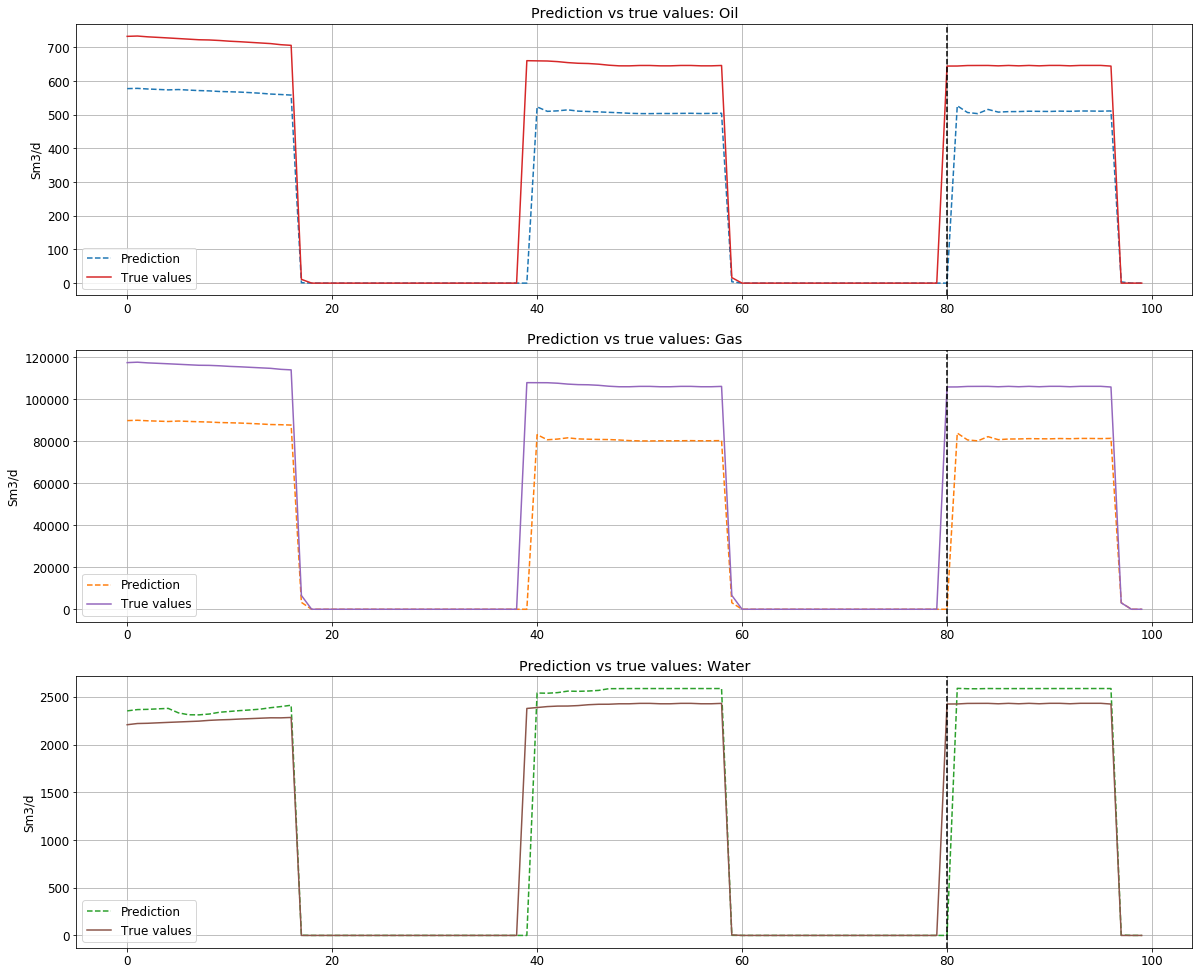

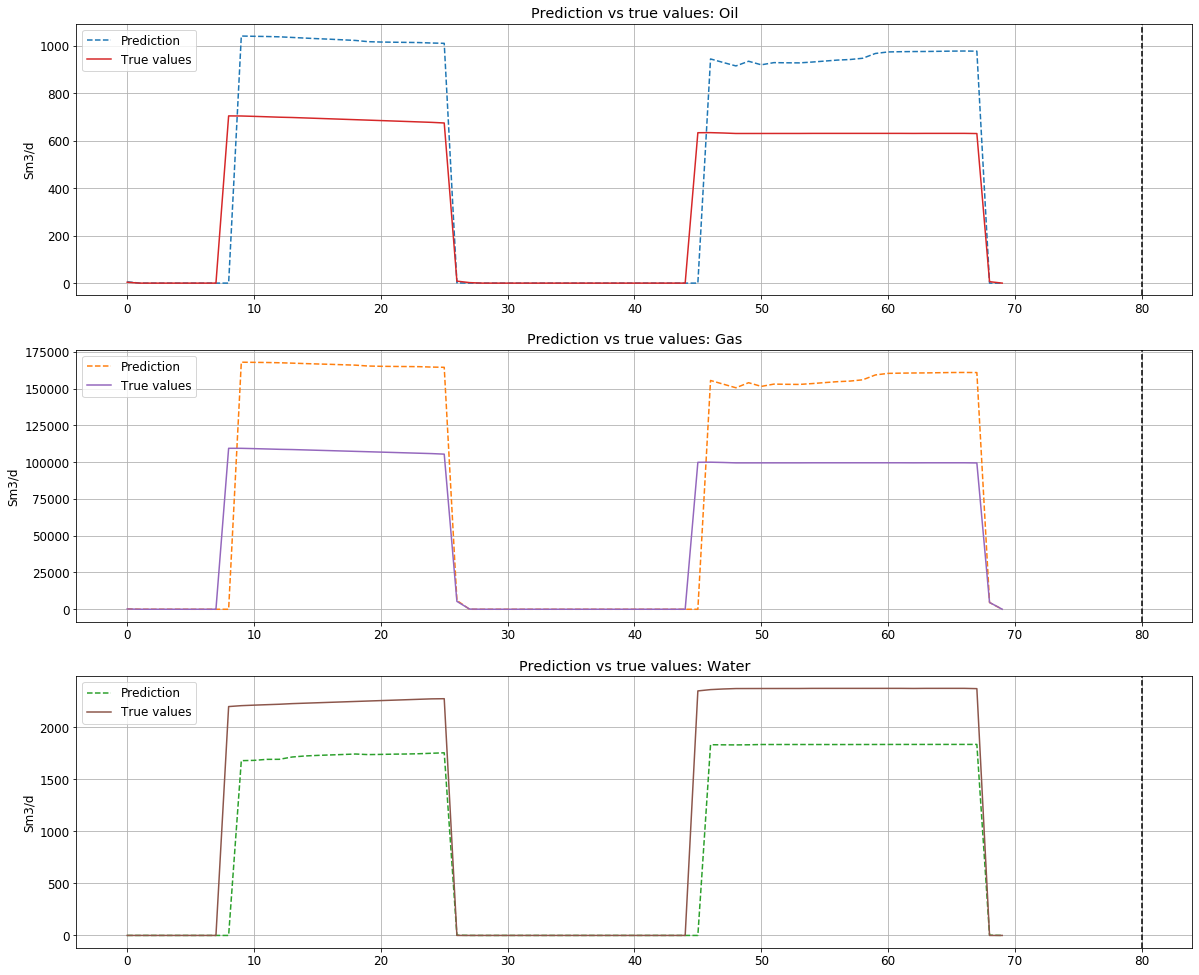

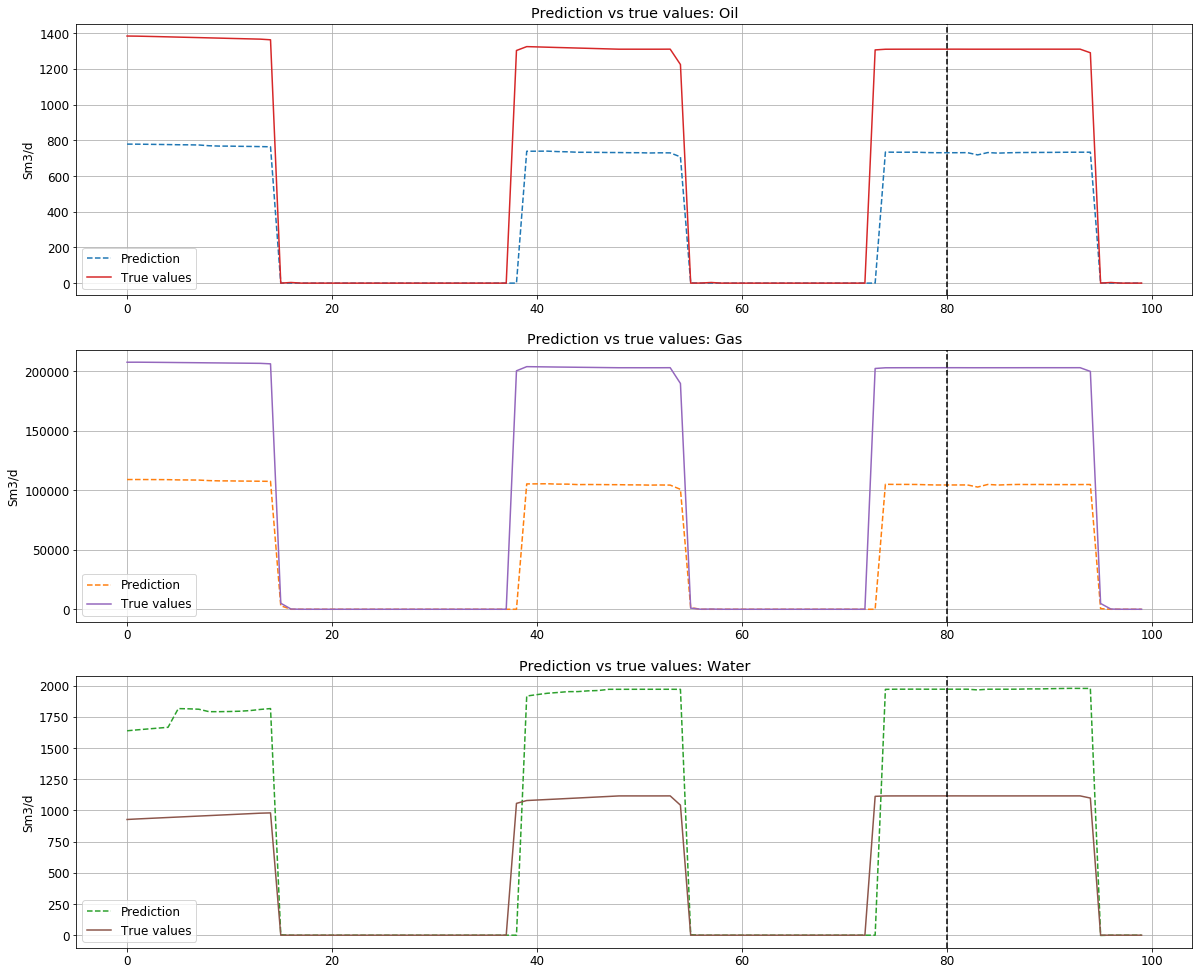

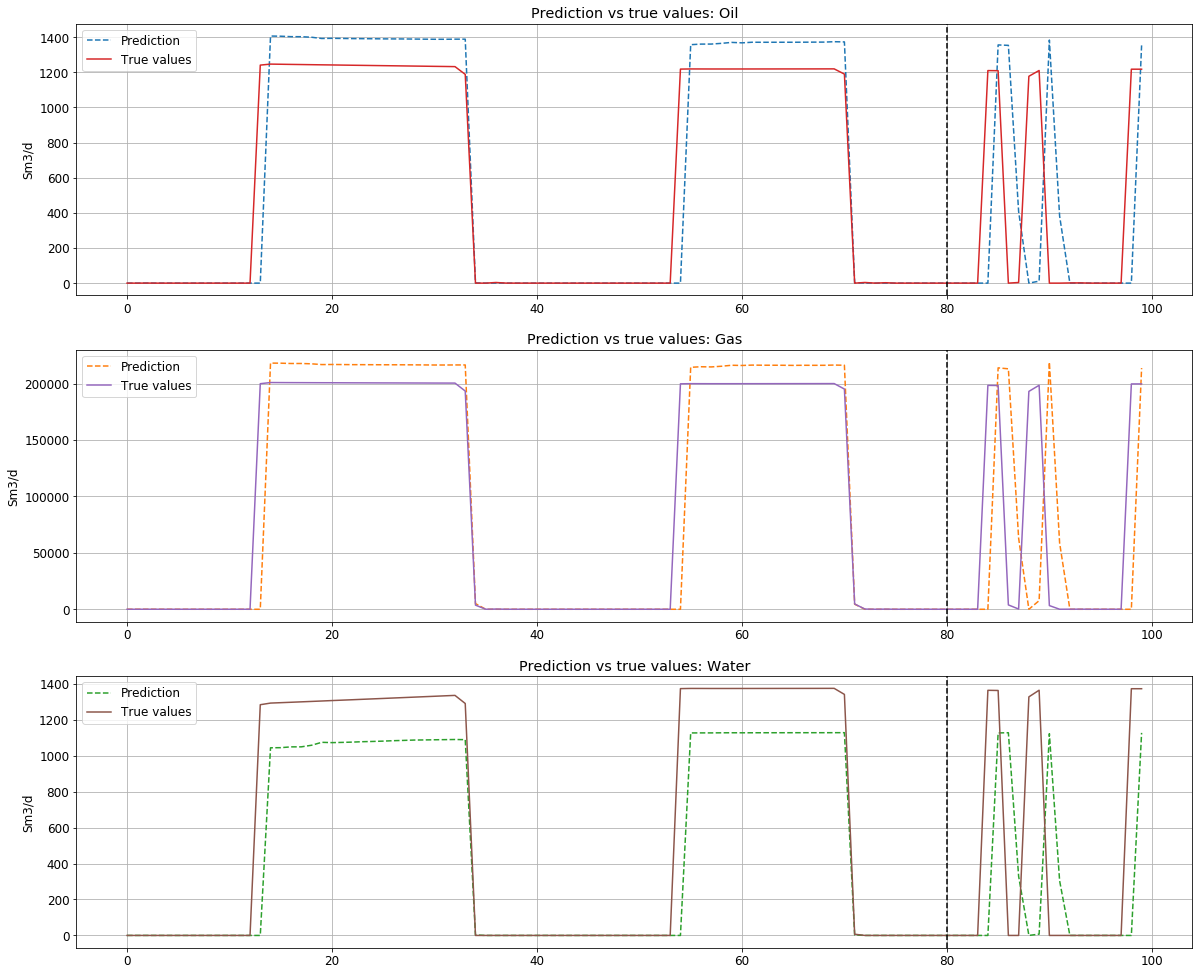

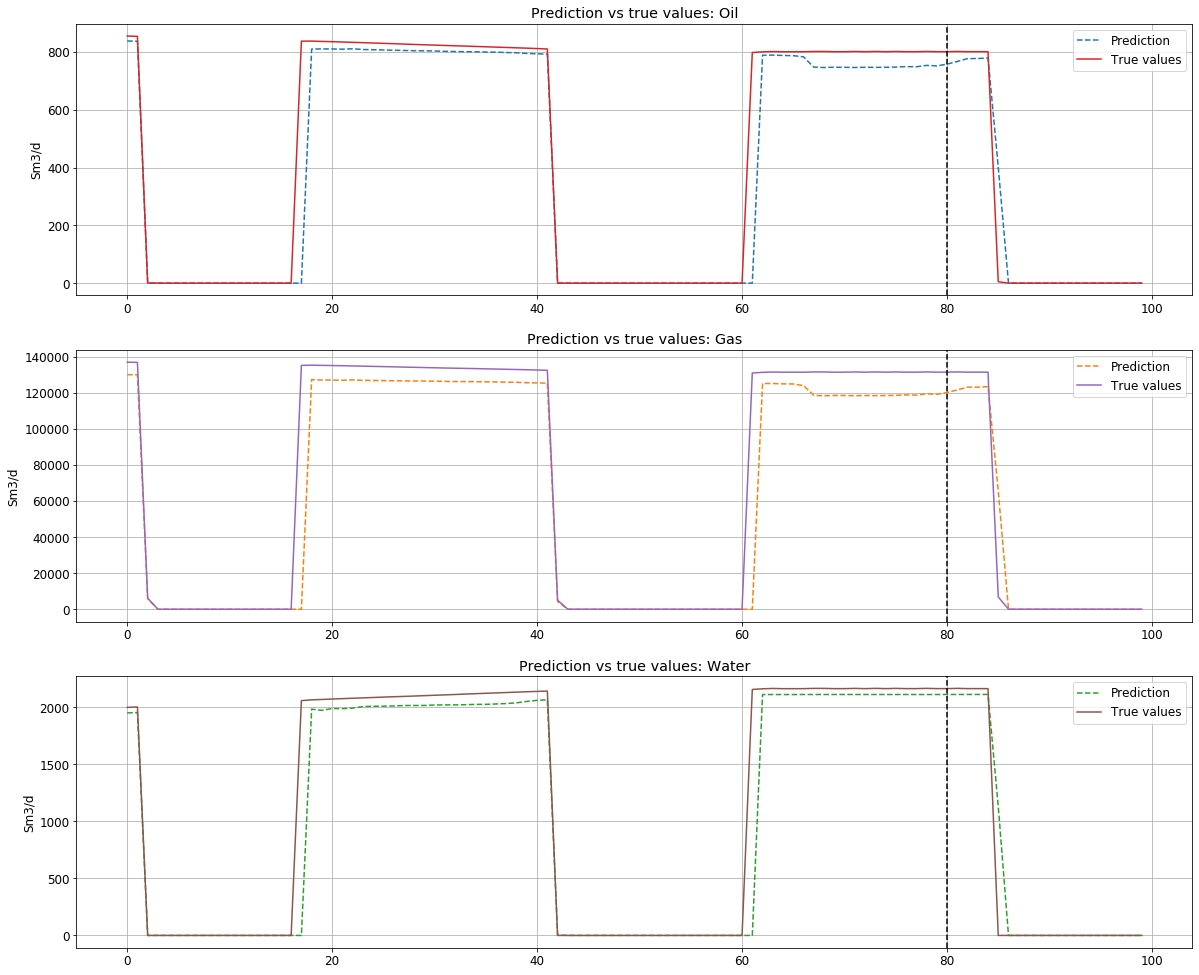

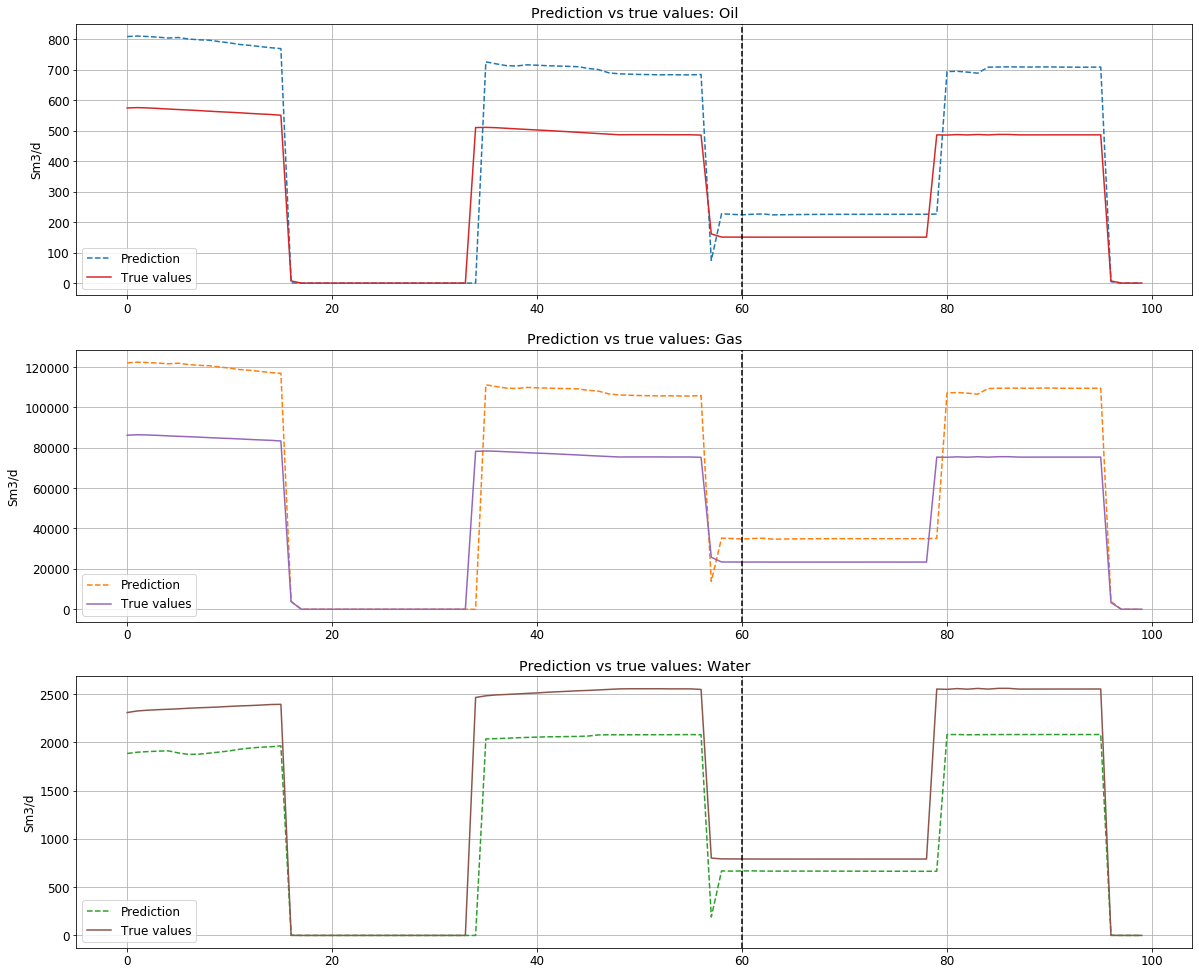

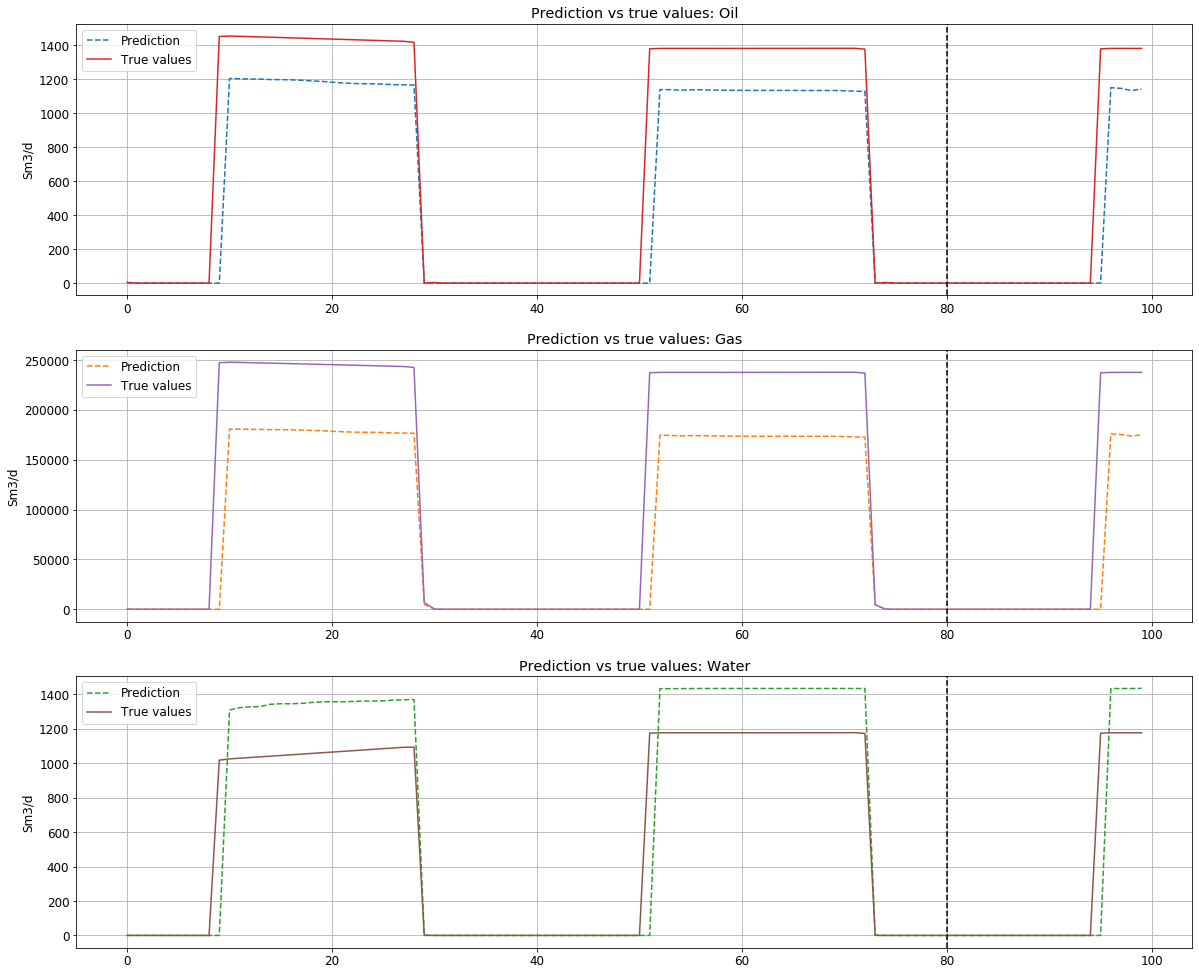

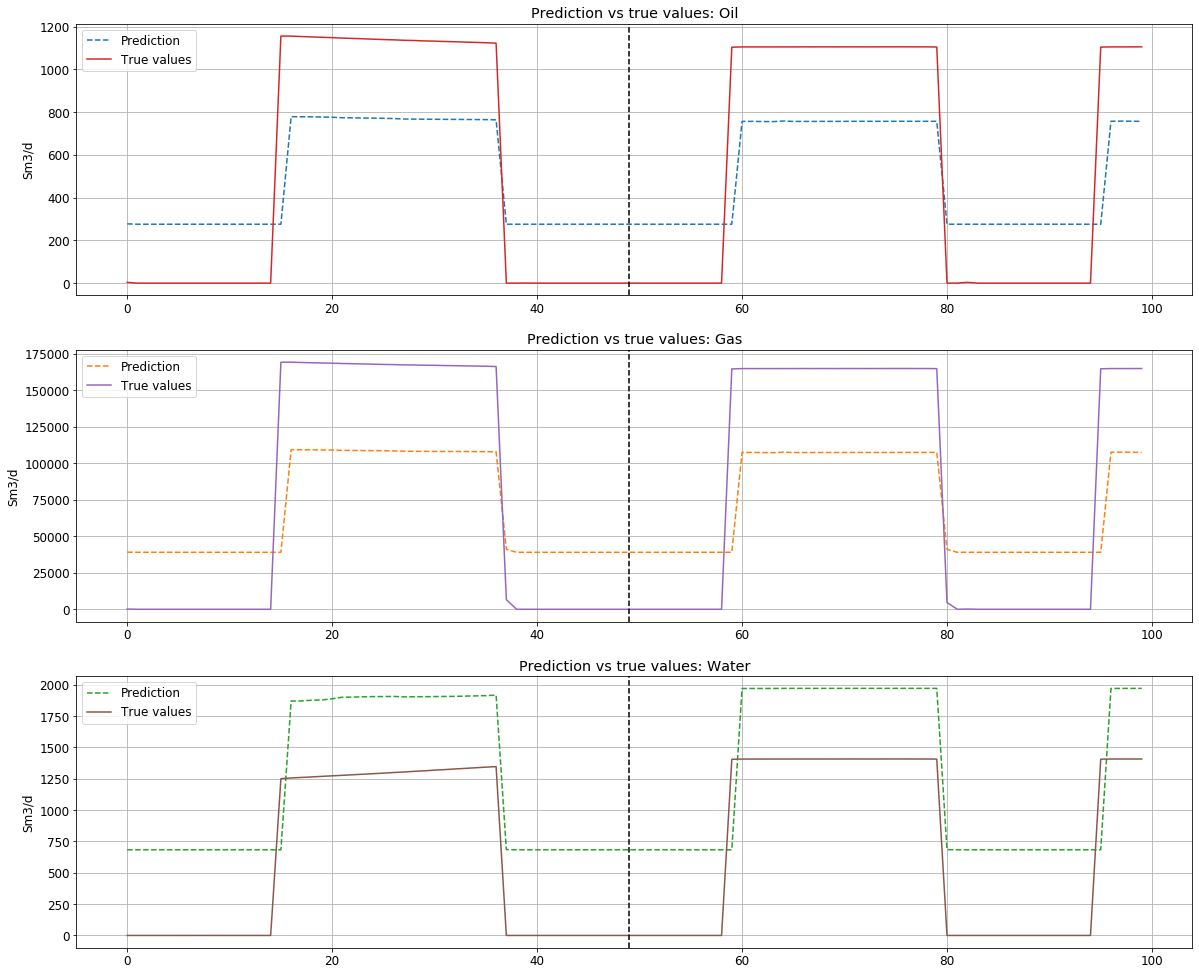

In [10]:
m = Gen(model_name='MLP-4', 
         study_path=STUDY_PATH, 
         real_file=REAL_FILE, 
         train_all_ratio=TRAIN_VAL_RATIO_GEN,
         gen_dfs_path=GEN_DFS_PATH,
         tpl_path=TPL_PATH,
         loss='mae', 
         lr=1e-4,
         n_layers=3, 
         n_neurons=100,
         dropout=0.2)

m.train(n_epochs=500, verbose=False)
err, t = m.predict(plot_losses=True, plot_preds=True, plot_errs=False, print_res=False)
m.print_info()
m.save()

## TCN

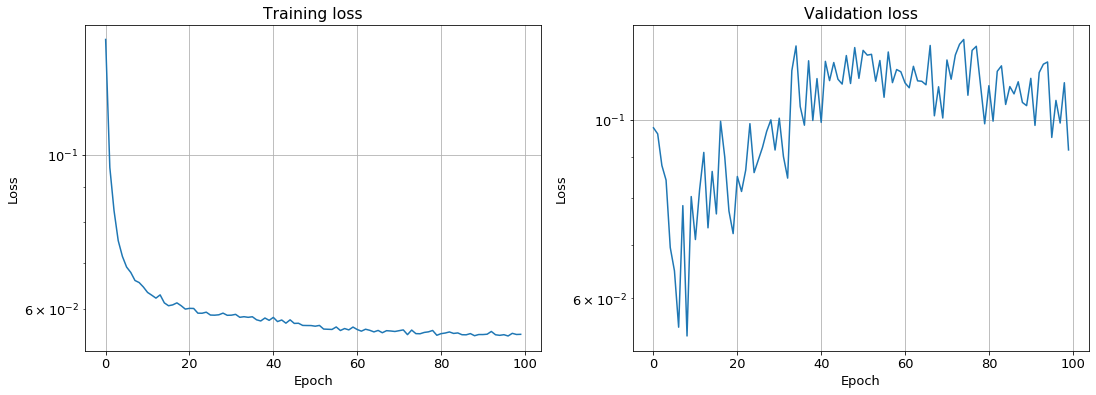

Train error:      34.544
Test error:       34.385
Training time:    871.000 s

train/all: 0.8
n_steps: 5
n_features_in: 6, n_features_out: 3
loss metric: mae
layers: 3, neurons: 50, droupout: 0.2
C:/Users/Asus/Desktop/Skoltech/Multiphase flows/data/Subsea_Study[1-4-7]/TCN-4.hdf saved


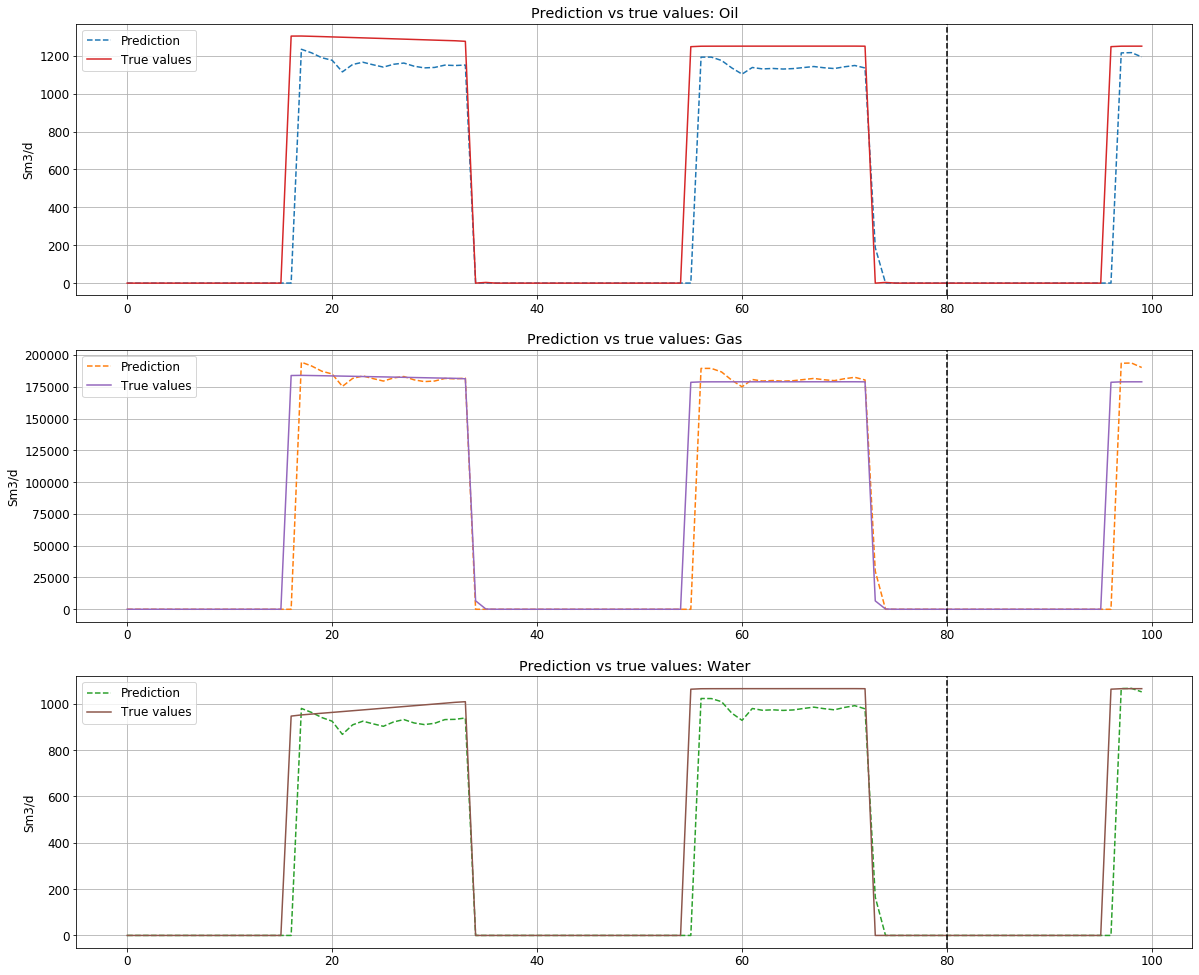

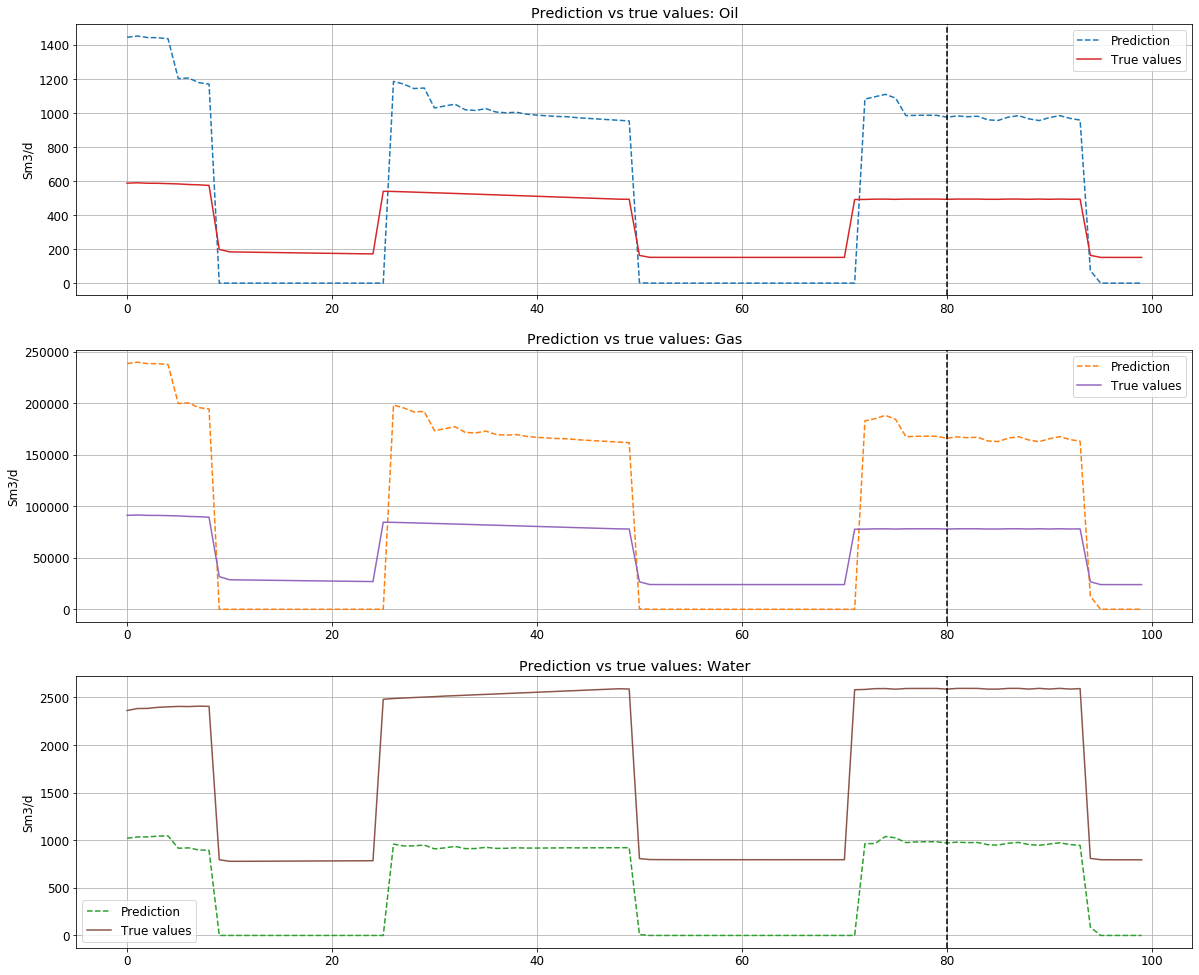

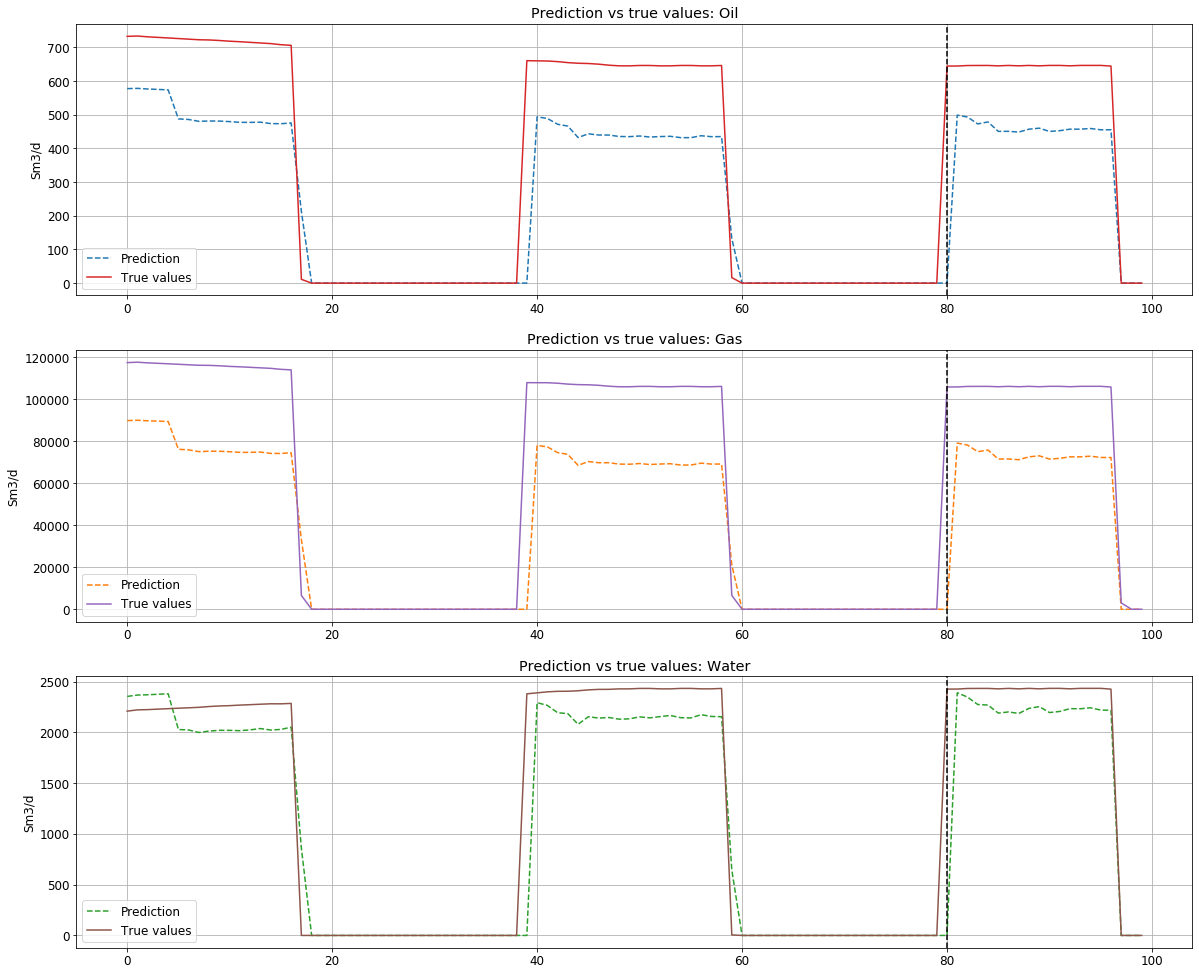

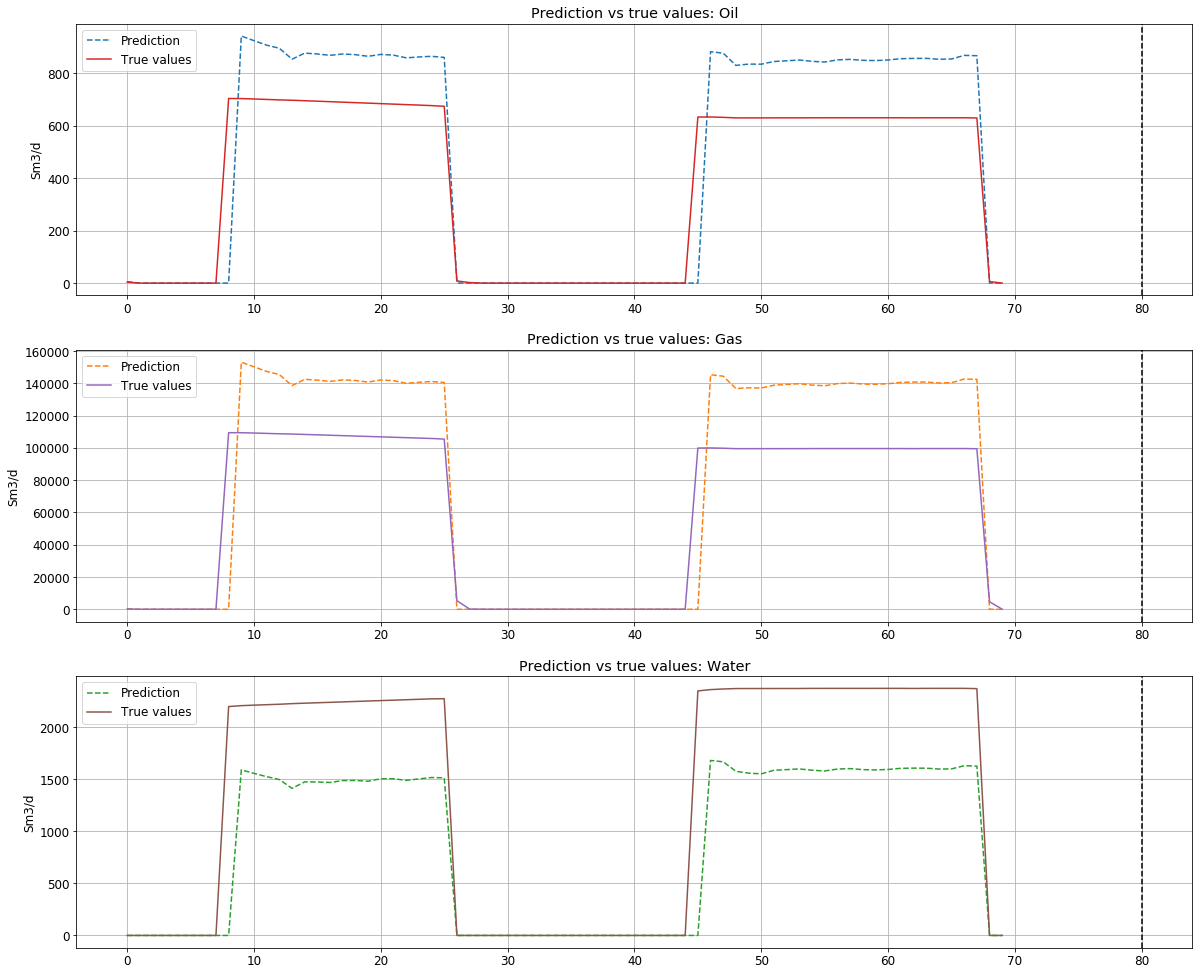

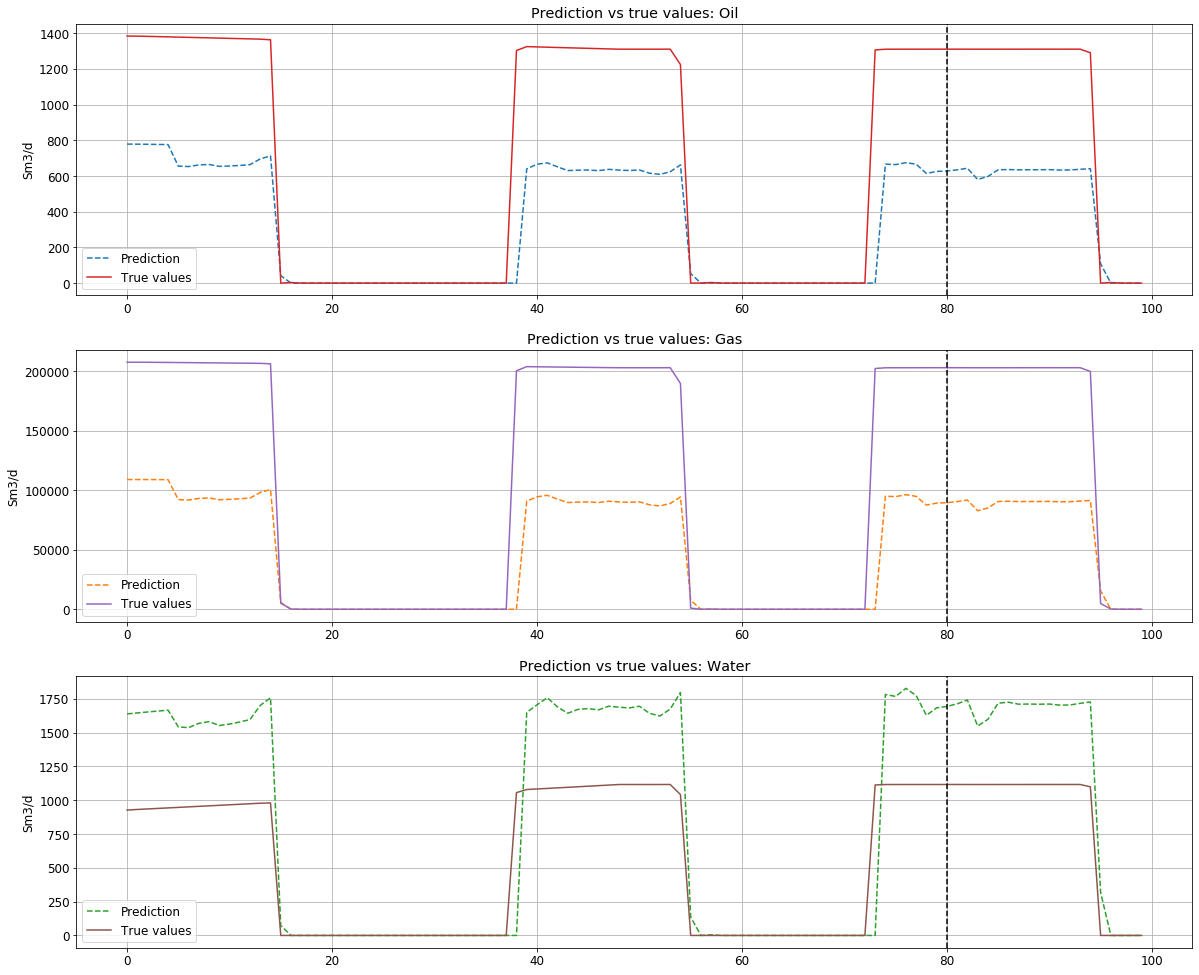

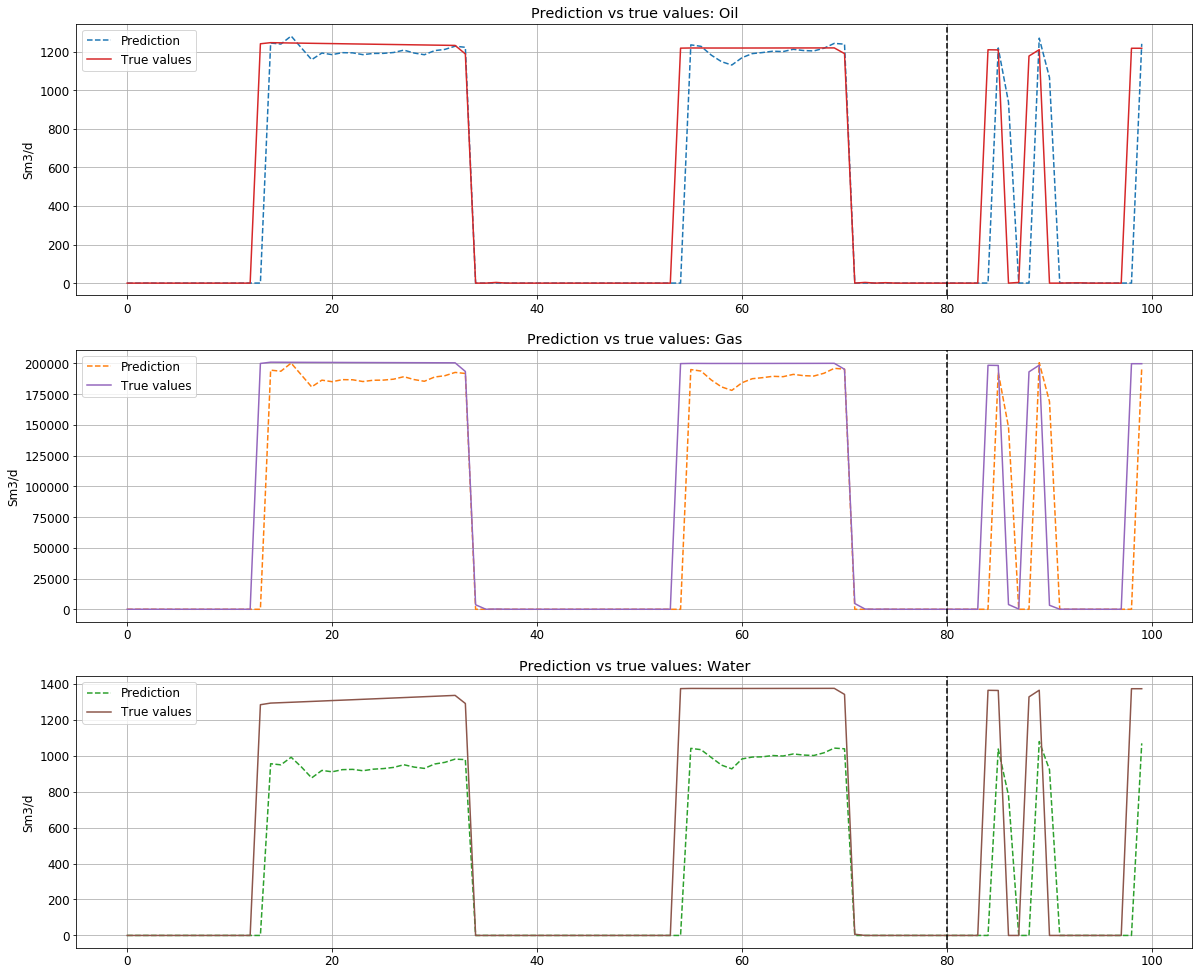

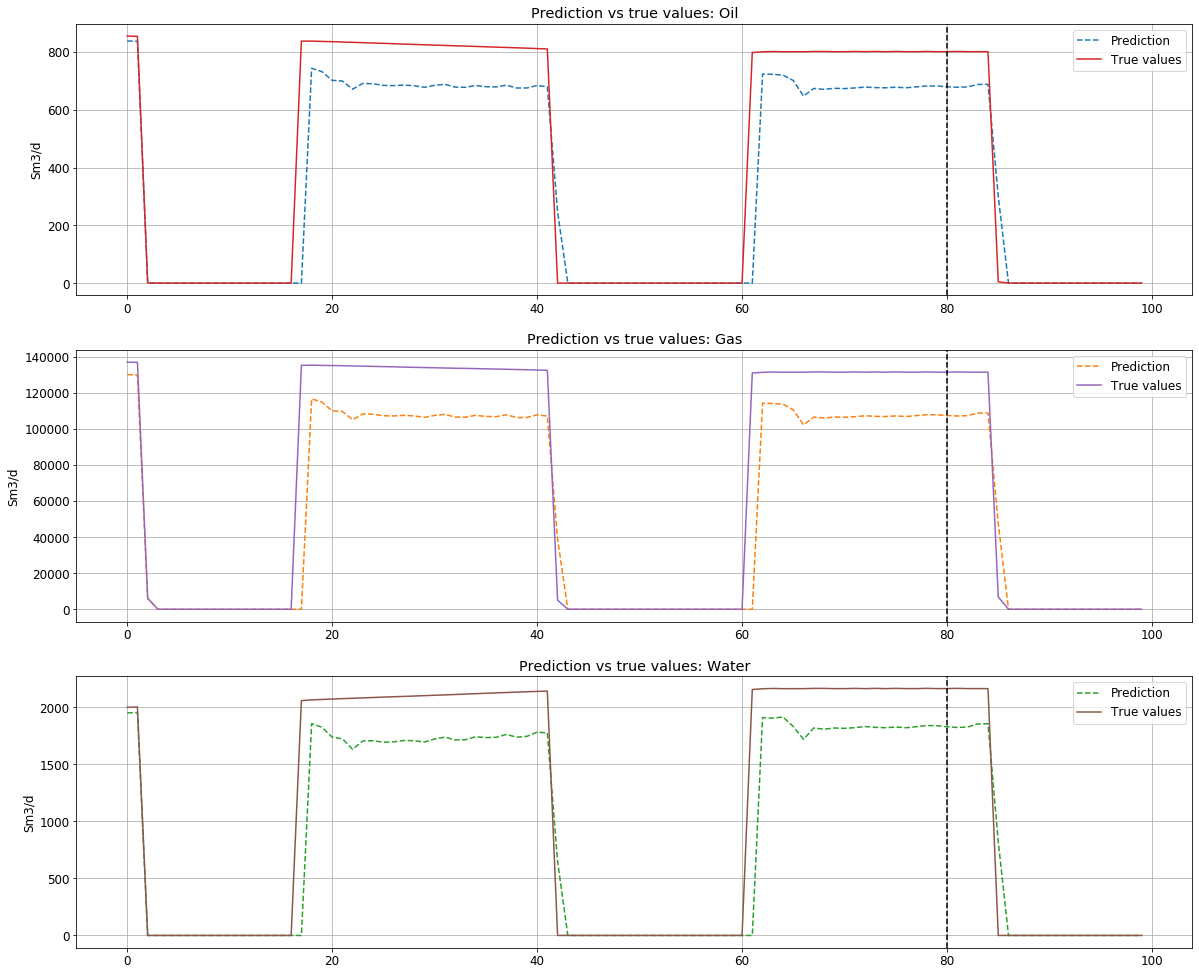

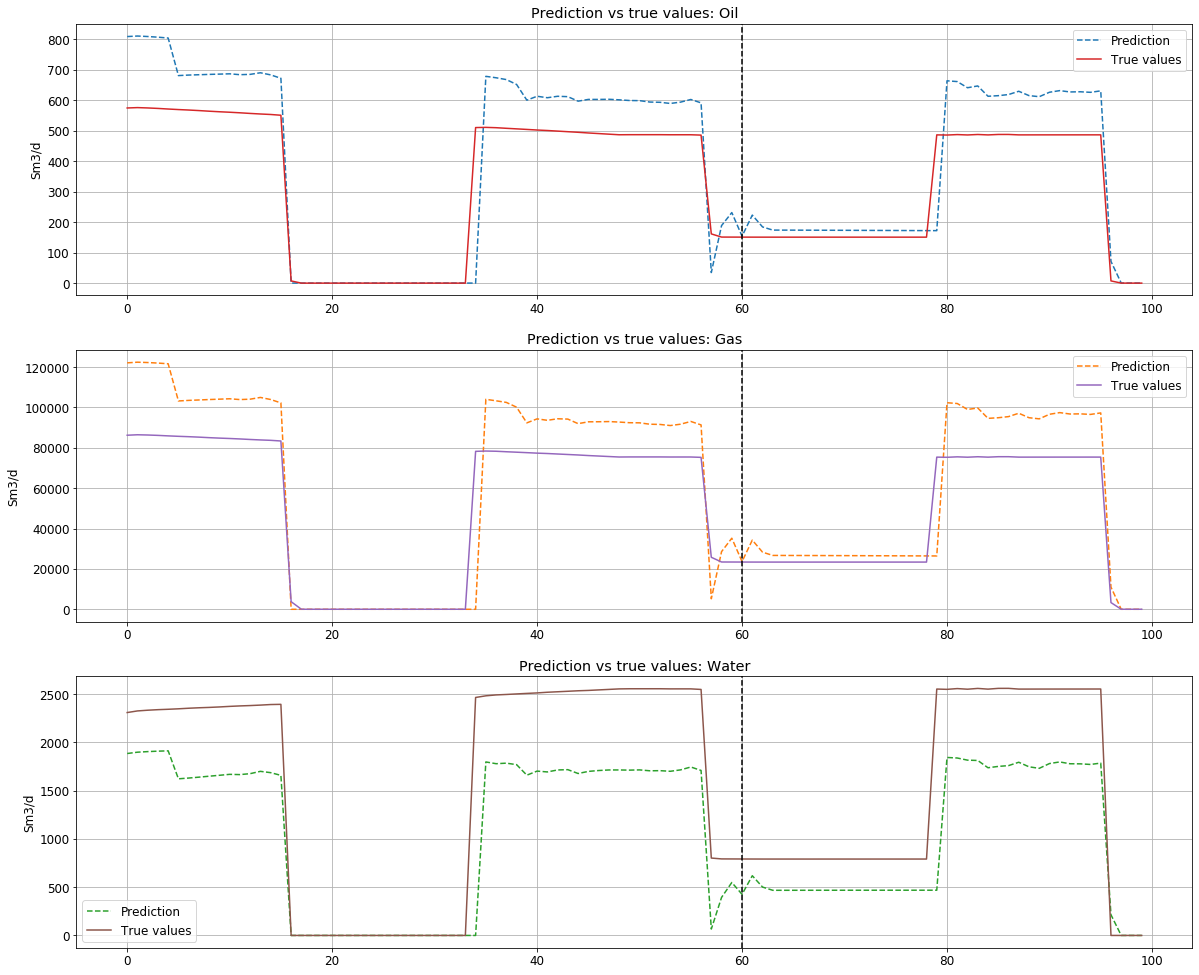

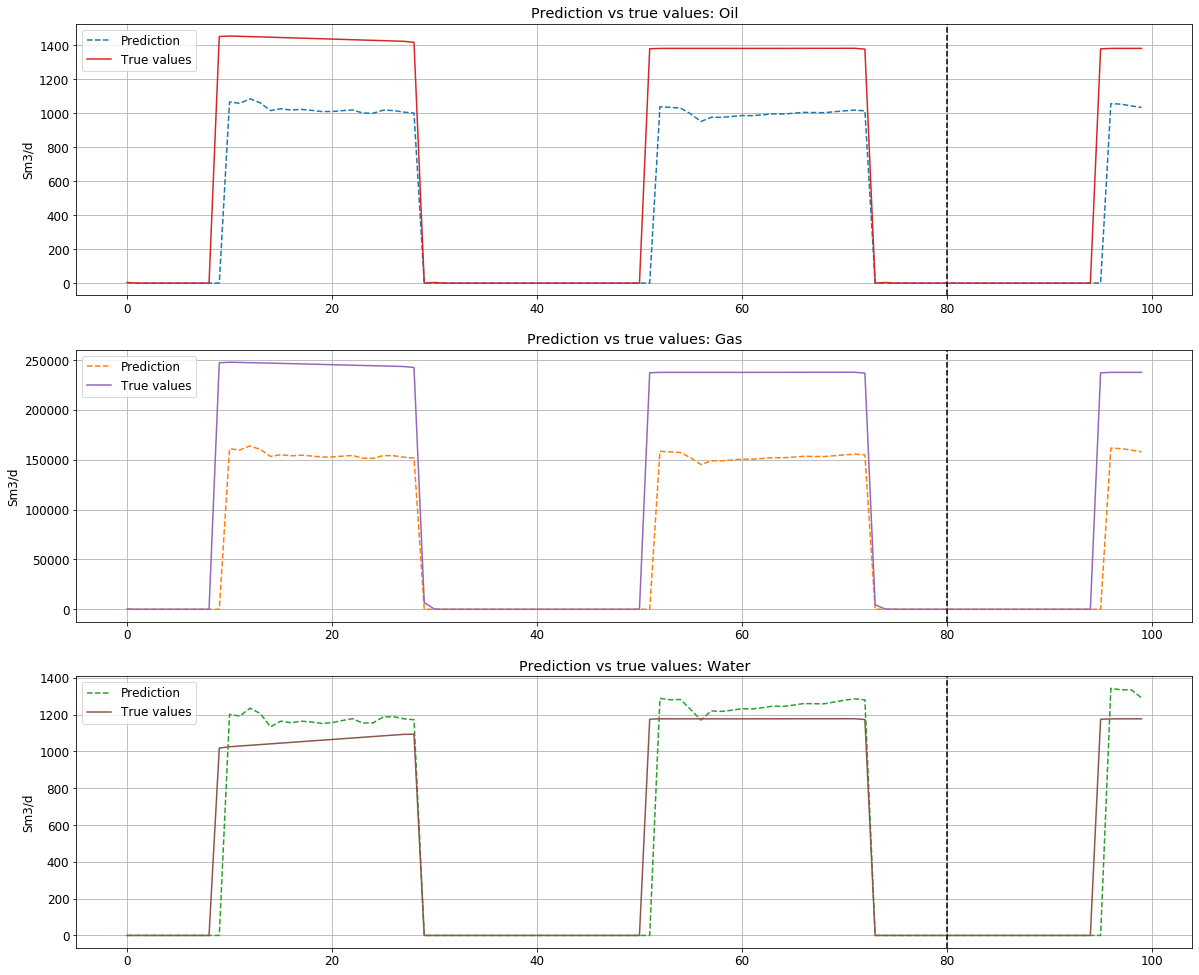

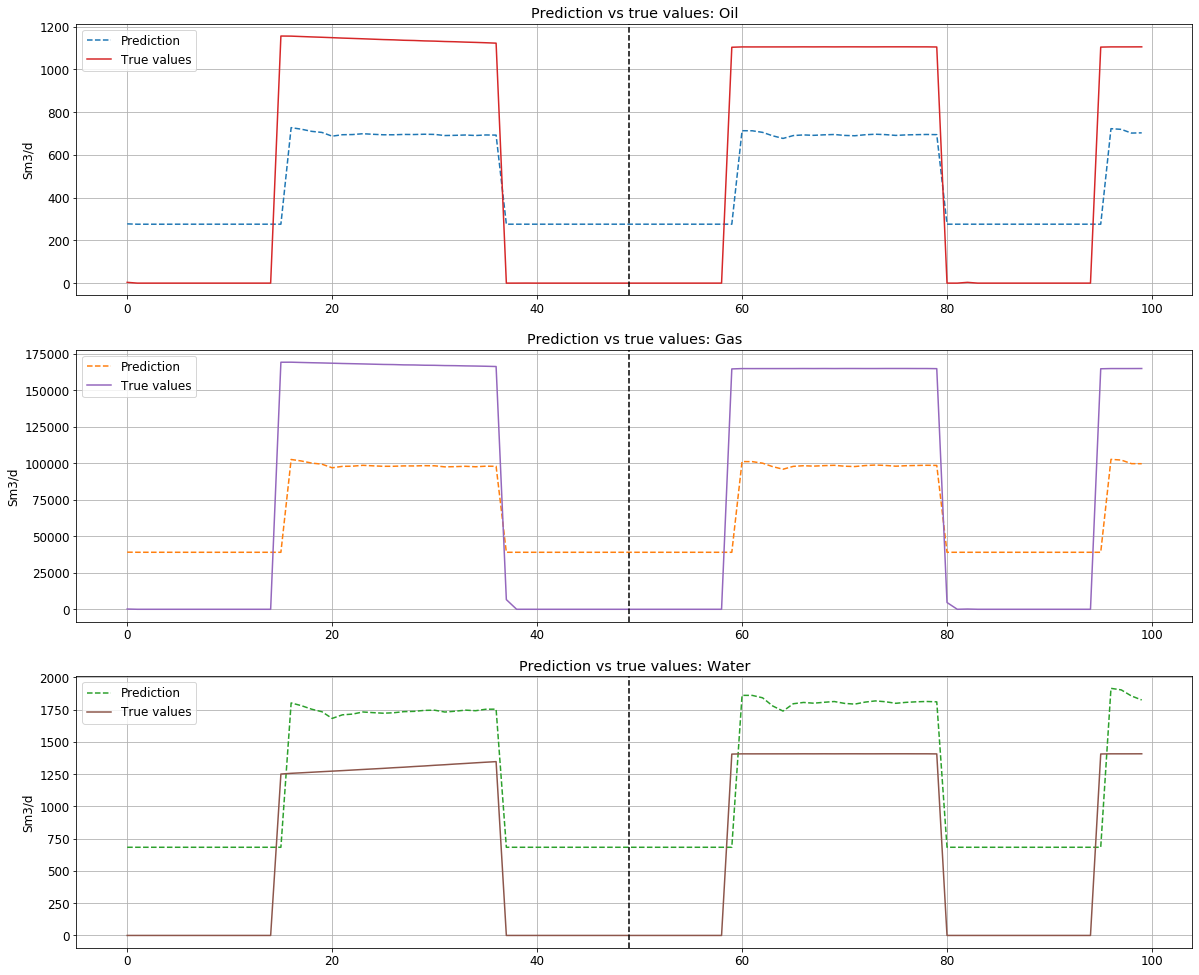

In [11]:
m = Gen(model_name='TCN-4', 
         study_path=STUDY_PATH, 
         real_file=REAL_FILE, 
         train_all_ratio=TRAIN_VAL_RATIO_GEN,
         gen_dfs_path=GEN_DFS_PATH,
         tpl_path=TPL_PATH,
         loss='mae', 
         lr=1e-3)

m.train(n_epochs=100, verbose=False)
err, t = m.predict(plot_losses=True, plot_preds=True, plot_errs=False, print_res=False)
m.print_info()
m.save()

## LSTM

In [ ]:
m = Gen(model_name='LSTM-4', 
         study_path=STUDY_PATH, 
         real_file=REAL_FILE, 
         train_all_ratio=TRAIN_VAL_RATIO_GEN,
         gen_dfs_path=GEN_DFS_PATH,
         tpl_path=TPL_PATH,
         loss='mae', 
         lr=1e-4,
         n_layers=3, 
         n_neurons=100,
         dropout=0.2)

m.train(n_epochs=100, verbose=False)
err, t = m.predict(plot_losses=True, plot_preds=True, plot_errs=False, print_res=False)
m.print_info()
m.save()